<details>
<summary><strong>DBAS3017 User Experience - Group Project</strong></summary>

**Group C:**
- Louise Fear
- James Laurence
- Gabriela Mkonde
- Niki Zheng
- Peter MacKinnon

**Earthquake Data Set:**
Source [Significant Earthquakes Dataset](https://www.kaggle.com/datasets/usamabuttar/significant-earthquakes/)

</details>

In [1]:
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install datetime
from datetime import datetime
# !pip install IPython
from IPython.display import HTML
from IPython.display import IFrame
# !pip install folium
import folium
from folium.plugins import MarkerCluster
# !pip install warnings
import warnings
# !pip install cartopy
import cartopy.crs as ccrs
# !pip install scipy
from scipy import stats
# !pip install geopy
import geopy
# !pip install geopandas
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
# !pip install reverse_geocoder
import reverse_geocoder as rg
# !pip install pycountry
import pycountry


# Ignore FutureWarnings for deprecated functions in libraries to keep output clean
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# to download the data using api key instead of downloading files from kaggle

# !pip install kaggle
# to download the data straight from kaggle
# import kaggle as kg
# kg.api.authenticate()
# kg.api.dataset_download_files(dataset="usamabuttar/significant-earthquakes", path='Data', unzip=True)


# eq = pd.read_csv('Significant_Earthquakes.csv')


In [3]:
# load earthquake dataset from group project team member with index set
eq = pd.read_csv('original_eq.csv', index_col=[0])

# set index name
eq.index.name = 'Index'

# display dataframe
eq

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
Index,,,,,,,,,,,,,,,,,,,,,
0,1900-10-09T12:25:00.000Z,57.0900,-153.4800,NaN,7.86,mw,NaN,NaN,NaN,NaN,...,2022-05-09T14:44:17.838Z,"16 km SW of Old Harbor, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt
1,1901-03-03T07:45:00.000Z,36.0000,-120.5000,NaN,6.40,ms,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"12 km NNW of Parkfield, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell
2,1901-07-26T22:20:00.000Z,40.8000,-115.7000,NaN,5.00,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"6 km SE of Elko, Nevada",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sjg
3,1901-12-30T22:34:00.000Z,52.0000,-160.0000,NaN,7.00,ms,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,south of Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
4,1902-01-01T05:20:30.000Z,52.3800,-167.4500,NaN,7.00,ms,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"113 km ESE of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99554,2023-11-06T21:31:01.203Z,-7.4821,156.1245,38.062,5.30,mww,169.0,26.0,5.120,0.49,...,2023-11-30T04:18:42.040Z,NaN,earthquake,9.59,4.538,0.083,14.0,reviewed,us,us
99555,2023-11-05T13:27:28.428Z,51.5184,178.3647,80.999,5.10,mb,71.0,143.0,0.457,0.81,...,2023-12-03T13:37:40.037Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,7.14,5.544,0.025,500.0,reviewed,us,us
99556,2023-11-04T09:38:37.943Z,20.2138,147.6712,10.000,5.00,mb,98.0,77.0,7.112,0.59,...,2023-12-02T09:48:49.538Z,Mariana Islands region,earthquake,9.40,1.837,0.032,305.0,reviewed,us,us


In [4]:
# Dataset Metadata
# time:             The time of the earthquake, reported as the number of milliseconds since the Unix epoch (January 1, 1970, 00:00:00 UTC).
# latitude:         The latitude of the earthquake's epicenter, reported in decimal degrees.
# longitude:        The longitude of the earthquake's epicenter, reported in decimal degrees.
# depth:            The depth of the earthquake, reported in kilometers.
# mag:              The magnitude of the earthquake, reported on various magnitude scales (see magType column below).
# magType:          The magnitude type used to report the earthquake magnitude (e.g. "mb", "ml", "mw").
# nst:              The total number of seismic stations used to calculate the earthquake location and magnitude.
# gap:              The largest azimuthal gap between azimuthally adjacent stations (in degrees).
# dmin:             The distance to the nearest station in degrees.
# rms:              The root-mean-square of the residuals of the earthquake's hypocenter location.
# net:              The ID of the seismic network used to locate the earthquake.
# id:               A unique identifier for the earthquake event.
# updated:          The time when the earthquake event was most recently updated in the catalog, reported as the number of milliseconds since the Unix epoch.
# place:            A human-readable description of the earthquake's location.
# type:             The type of seismic event (e.g. "earthquake", "quarry blast", "explosion").
# horizontalError:  The horizontal error, in kilometers, of the location reported in the latitude and longitude columns.
# depthError:       The depth error, in kilometers, of the depth column.
# magError:         The estimated standard error of the reported earthquake magnitude.
# magNst:           The number of seismic stations used to calculate the earthquake magnitude.
# status:           The status of the earthquake event in the USGS earthquake catalog (e.g. "reviewed", "automatic").
# locationSource:   The ID of the agency or network that provided the earthquake location.
# magSource:        The ID of the agency or network that provided the earthquake magnitude.

In [5]:
eq.isna().sum()

time                   0
latitude               0
longitude              0
depth                285
mag                    0
magType                0
nst                70588
gap                60295
dmin               80233
rms                28743
net                    0
id                     0
updated                0
place                832
type                   0
horizontalError    81608
depthError         49711
magError           66978
magNst             59967
status                 0
locationSource         0
magSource              0
dtype: int64

In [6]:
# Display dataframe shape
print(f'\nEarthquake Dataframe Shape is {eq.shape}\n')
# Display dataframe info
eq.info()


Earthquake Dataframe Shape is (99559, 22)

<class 'pandas.core.frame.DataFrame'>
Index: 99559 entries, 0 to 99558
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             99559 non-null  object 
 1   latitude         99559 non-null  float64
 2   longitude        99559 non-null  float64
 3   depth            99274 non-null  float64
 4   mag              99559 non-null  float64
 5   magType          99559 non-null  object 
 6   nst              28971 non-null  float64
 7   gap              39264 non-null  float64
 8   dmin             19326 non-null  float64
 9   rms              70816 non-null  float64
 10  net              99559 non-null  object 
 11  id               99559 non-null  object 
 12  updated          99559 non-null  object 
 13  place            98727 non-null  object 
 14  type             99559 non-null  object 
 15  horizontalError  17951 non-null  float64
 16  depthError       49

In [7]:
# set time column as Date Time data type to be UTC to remove string characters
eq['time'] = pd.to_datetime(eq['time']).dt.tz_convert(None)

# set update column as Date Time data type to be UTC to remove string characters
eq['updated'] = pd.to_datetime(eq['updated']).dt.tz_convert(None)

eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
Index,,,,,,,,,,,,,,,,,,,,,
0,1900-10-09 12:25:00,57.09,-153.48,NaN,7.86,mw,NaN,NaN,NaN,NaN,...,2022-05-09 14:44:17.838,"16 km SW of Old Harbor, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt
1,1901-03-03 07:45:00,36.00,-120.50,NaN,6.40,ms,NaN,NaN,NaN,NaN,...,2018-06-04 20:43:44.000,"12 km NNW of Parkfield, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell
2,1901-07-26 22:20:00,40.80,-115.70,NaN,5.00,fa,NaN,NaN,NaN,NaN,...,2018-06-04 20:43:44.000,"6 km SE of Elko, Nevada",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sjg
3,1901-12-30 22:34:00,52.00,-160.00,NaN,7.00,ms,NaN,NaN,NaN,NaN,...,2018-06-04 20:43:44.000,south of Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
4,1902-01-01 05:20:30,52.38,-167.45,NaN,7.00,ms,NaN,NaN,NaN,NaN,...,2018-06-04 20:43:44.000,"113 km ESE of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe


In [8]:
# listed remaining null values
eq.isna().sum()

time                   0
latitude               0
longitude              0
depth                285
mag                    0
magType                0
nst                70588
gap                60295
dmin               80233
rms                28743
net                    0
id                     0
updated                0
place                832
type                   0
horizontalError    81608
depthError         49711
magError           66978
magNst             59967
status                 0
locationSource         0
magSource              0
dtype: int64

In [9]:
# replacing null values in place column with 'unknown' in orignal eq dataframe
eq['place'].fillna('Unknown', inplace=True)

# verfiying Unknown Inputs in Place column
unknown = (eq.isin(['Unknown']).sum())
unknown

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                  0
gap                  0
dmin                 0
rms                  0
net                  0
id                   0
updated              0
place              832
type                 0
horizontalError      0
depthError           0
magError             0
magNst               0
status               0
locationSource       0
magSource            0
dtype: int64

In [10]:
# drop the row that have nulls in the depth column
eq.dropna(subset=['depth'], inplace=True)

In [11]:
# listed remaining null values/verifying depth nulls are gone
eq.isna().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                70303
gap                60010
dmin               79948
rms                28458
net                    0
id                     0
updated                0
place                  0
type                   0
horizontalError    81323
depthError         49426
magError           66693
magNst             59682
status                 0
locationSource         0
magSource              0
dtype: int64

In [12]:
# Convert 'time' column to datetime to split off year
eq['time'] = pd.to_datetime(eq['time'])

# Extract year from 'time' column
eq['year'] = eq['time'].dt.year
# Extract month from 'time' column
eq['month'] = eq['time'].dt.month
# Extract day from 'time' column
eq['day'] = eq['time'].dt.day
# Extract time from 'time' column
eq['UTC_time'] = eq['time'].dt.time


# reset the index and drops it
eq = eq.reset_index(drop=True)

# sets the index to start at 1
eq.index = eq.index + 1

# display the dataframe
eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,depthError,magError,magNst,status,locationSource,magSource,year,month,day,UTC_time
1,1904-04-04 10:26:00.880,41.758,23.249,15.0,7.02,mw,NaN,NaN,NaN,NaN,...,4.8,0.4,NaN,reviewed,iscgem,iscgem,1904,4,4,10:26:00.880000
2,1904-04-04 10:02:34.560,41.802,23.108,15.0,6.84,mw,NaN,NaN,NaN,NaN,...,4.8,0.4,NaN,reviewed,iscgem,iscgem,1904,4,4,10:02:34.560000
3,1904-06-25 21:00:38.720,52.763,160.277,30.0,7.70,mw,NaN,NaN,NaN,NaN,...,10.3,0.4,NaN,reviewed,iscgem,iscgem,1904,6,25,21:00:38.720000
4,1904-06-25 14:45:39.140,51.424,161.638,15.0,7.50,mw,NaN,NaN,NaN,NaN,...,25.0,0.4,NaN,reviewed,iscgem,iscgem,1904,6,25,14:45:39.140000
5,1904-08-30 11:43:20.850,30.684,100.608,15.0,7.09,mw,NaN,NaN,NaN,NaN,...,25.0,0.4,NaN,reviewed,iscgem,iscgem,1904,8,30,11:43:20.850000


In [13]:

# Define the new column order
new_order = ['year', 'month', 'day', 'UTC_time', 'type', 'mag', 'magType', 'depth', 'place', 'longitude', 'latitude'] + [col for col in eq.columns if col not in ['year', 'month', 'day', 'UTC_time', 'type', 'mag', 'magType', 'depth', 'place', 'longitude', 'latitude']]

# Reorder the columns
eq = eq[new_order]

# Reset the index and rename the index column to 'Index'
eq.reset_index(drop=True, inplace=True)

In [14]:
eq.head()

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,...,net,id,updated,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1904,4,4,10:26:00.880000,earthquake,7.02,mw,15.0,"7 km SE of Stara Kresna, Bulgaria",23.249,...,iscgem,iscgem16957813,2022-04-26 14:54:31.433,NaN,4.8,0.4,NaN,reviewed,iscgem,iscgem
1,1904,4,4,10:02:34.560000,earthquake,6.84,mw,15.0,"6 km W of Stara Kresna, Bulgaria",23.108,...,iscgem,iscgem610326271,2022-04-25 20:36:18.723,NaN,4.8,0.4,NaN,reviewed,iscgem,iscgem
2,1904,6,25,21:00:38.720000,earthquake,7.70,mw,30.0,"115 km ESE of Petropavlovsk-Kamchatsky, Russia",160.277,...,iscgem,iscgem16957819,2022-04-25 20:22:48.406,NaN,10.3,0.4,NaN,reviewed,iscgem,iscgem
3,1904,6,25,14:45:39.140000,earthquake,7.50,mw,15.0,"274 km SE of Petropavlovsk-Kamchatsky, Russia",161.638,...,iscgem,iscgem16957820,2022-05-09 22:48:24.972,NaN,25.0,0.4,NaN,reviewed,iscgem,iscgem
4,1904,8,30,11:43:20.850000,earthquake,7.09,mw,15.0,"150 km WNW of Kangding, China",100.608,...,iscgem,iscgem16957826,2022-04-25 20:23:00.657,NaN,25.0,0.4,NaN,reviewed,iscgem,iscgem


In [15]:
eq.type.value_counts()

type
earthquake           98784
nuclear explosion      424
volcanic eruption       54
explosion               10
rock burst               1
mine collapse            1
Name: count, dtype: int64

In [16]:
eq.magType.value_counts()

magType
mb            39788
mw            24311
mwc           17458
mww           10563
ms             3157
mwb            3060
ml              414
mwr             390
md               50
mh               23
m                21
uk                8
mwp               6
fa                5
Mi                4
ml(texnet)        4
ms_20             3
mc                2
mlg               1
Md                1
Ml                1
mb_lg             1
lg                1
Mb                1
ma                1
Name: count, dtype: int64

In [17]:
# for magTypes column --> removing less than 500 data points would only result in a loss of less than 0.5% of your total data
# won't affect overall outcomes to remove these outliers
# create a boolean mask to filter dataset
mag_types = ['mb', 'mw', 'mwc', 'mww', 'ms', 'mwb']

# Create a new DataFrame that only includes the rows with the specified magTypes
eq = eq[eq['magType'].isin(mag_types)]

eq.head()

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,...,net,id,updated,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1904,4,4,10:26:00.880000,earthquake,7.02,mw,15.0,"7 km SE of Stara Kresna, Bulgaria",23.249,...,iscgem,iscgem16957813,2022-04-26 14:54:31.433,NaN,4.8,0.4,NaN,reviewed,iscgem,iscgem
1,1904,4,4,10:02:34.560000,earthquake,6.84,mw,15.0,"6 km W of Stara Kresna, Bulgaria",23.108,...,iscgem,iscgem610326271,2022-04-25 20:36:18.723,NaN,4.8,0.4,NaN,reviewed,iscgem,iscgem
2,1904,6,25,21:00:38.720000,earthquake,7.70,mw,30.0,"115 km ESE of Petropavlovsk-Kamchatsky, Russia",160.277,...,iscgem,iscgem16957819,2022-04-25 20:22:48.406,NaN,10.3,0.4,NaN,reviewed,iscgem,iscgem
3,1904,6,25,14:45:39.140000,earthquake,7.50,mw,15.0,"274 km SE of Petropavlovsk-Kamchatsky, Russia",161.638,...,iscgem,iscgem16957820,2022-05-09 22:48:24.972,NaN,25.0,0.4,NaN,reviewed,iscgem,iscgem
4,1904,8,30,11:43:20.850000,earthquake,7.09,mw,15.0,"150 km WNW of Kangding, China",100.608,...,iscgem,iscgem16957826,2022-04-25 20:23:00.657,NaN,25.0,0.4,NaN,reviewed,iscgem,iscgem


In [18]:
eq.magType.value_counts()

magType
mb     39788
mw     24311
mwc    17458
mww    10563
ms      3157
mwb     3060
Name: count, dtype: int64

In [19]:
# check updated dataframe
eq

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,...,net,id,updated,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1904,4,4,10:26:00.880000,earthquake,7.02,mw,15.000,"7 km SE of Stara Kresna, Bulgaria",23.2490,...,iscgem,iscgem16957813,2022-04-26 14:54:31.433,NaN,4.800,0.400,NaN,reviewed,iscgem,iscgem
1,1904,4,4,10:02:34.560000,earthquake,6.84,mw,15.000,"6 km W of Stara Kresna, Bulgaria",23.1080,...,iscgem,iscgem610326271,2022-04-25 20:36:18.723,NaN,4.800,0.400,NaN,reviewed,iscgem,iscgem
2,1904,6,25,21:00:38.720000,earthquake,7.70,mw,30.000,"115 km ESE of Petropavlovsk-Kamchatsky, Russia",160.2770,...,iscgem,iscgem16957819,2022-04-25 20:22:48.406,NaN,10.300,0.400,NaN,reviewed,iscgem,iscgem
3,1904,6,25,14:45:39.140000,earthquake,7.50,mw,15.000,"274 km SE of Petropavlovsk-Kamchatsky, Russia",161.6380,...,iscgem,iscgem16957820,2022-05-09 22:48:24.972,NaN,25.000,0.400,NaN,reviewed,iscgem,iscgem
4,1904,8,30,11:43:20.850000,earthquake,7.09,mw,15.000,"150 km WNW of Kangding, China",100.6080,...,iscgem,iscgem16957826,2022-04-25 20:23:00.657,NaN,25.000,0.400,NaN,reviewed,iscgem,iscgem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99269,2023,11,6,21:31:01.203000,earthquake,5.30,mww,38.062,Unknown,156.1245,...,us,us7000l98e,2023-11-30 04:18:42.040,9.59,4.538,0.083,14.0,reviewed,us,us
99270,2023,11,5,13:27:28.428000,earthquake,5.10,mb,80.999,"Rat Islands, Aleutian Islands, Alaska",178.3647,...,us,us7000l90i,2023-12-03 13:37:40.037,7.14,5.544,0.025,500.0,reviewed,us,us
99271,2023,11,4,09:38:37.943000,earthquake,5.00,mb,10.000,Mariana Islands region,147.6712,...,us,us7000l8um,2023-12-02 09:48:49.538,9.40,1.837,0.032,305.0,reviewed,us,us
99272,2023,11,3,18:32:14.876000,earthquake,5.00,mb,65.215,"73 km SSE of Severo-Kuril’sk, Russia",156.3754,...,us,us7000l8pk,2023-11-29 22:27:54.040,9.83,5.143,0.044,174.0,reviewed,us,us


In [20]:
# Create a boolean mask for duplicate rows
duplicate_mask = eq.duplicated(keep=False)

# create a df copy to leave eq intact
duplicates = eq.copy()

# Print out the duplicate rows
duplicates = eq[duplicate_mask]

duplicates = duplicates.sort_values(by='time', ascending=True)

duplicates

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,...,net,id,updated,horizontalError,depthError,magError,magNst,status,locationSource,magSource
95810,2023,3,1,13:59:22.168000,earthquake,5.0,mb,16.780,"Bonin Islands, Japan region",142.7793,...,us,us7000jgk0,2023-03-30 12:38:14.040,7.28,4.466,0.054,115.0,reviewed,us,us
95776,2023,3,1,13:59:22.168000,earthquake,5.0,mb,16.780,"Bonin Islands, Japan region",142.7793,...,us,us7000jgk0,2023-03-30 12:38:14.040,7.28,4.466,0.054,115.0,reviewed,us,us
95799,2023,3,1,13:59:22.168000,earthquake,5.0,mb,16.780,"Bonin Islands, Japan region",142.7793,...,us,us7000jgk0,2023-03-30 12:38:14.040,7.28,4.466,0.054,115.0,reviewed,us,us
95788,2023,3,1,13:59:22.168000,earthquake,5.0,mb,16.780,"Bonin Islands, Japan region",142.7793,...,us,us7000jgk0,2023-03-30 12:38:14.040,7.28,4.466,0.054,115.0,reviewed,us,us
95809,2023,3,3,09:41:20.779000,earthquake,5.0,mb,80.600,"117 km WNW of Panguna, Papua New Guinea",154.5022,...,us,us7000jgzw,2023-03-30 12:59:39.040,11.50,7.000,0.051,125.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99043,2023,11,25,06:20:42.122000,earthquake,5.0,mb,10.000,Unknown,145.4699,...,us,us6000lqmy,2023-11-25 06:35:05.040,9.91,1.846,0.069,68.0,reviewed,us,us
99222,2023,11,25,12:59:53.052000,earthquake,5.1,mww,151.378,"86 km ESE of Palora, Ecuador",-77.3110,...,us,us6000lqpg,2023-11-25 13:17:26.040,8.02,6.022,0.075,17.0,reviewed,us,us
99042,2023,11,25,12:59:53.052000,earthquake,5.1,mww,151.378,"86 km ESE of Palora, Ecuador",-77.3110,...,us,us6000lqpg,2023-11-25 13:17:26.040,8.02,6.022,0.075,17.0,reviewed,us,us
99038,2023,11,26,08:24:35.374000,earthquake,5.1,mww,121.759,"8 km NNW of Odala, Philippines",120.8014,...,us,us6000lqu5,2023-11-26 08:45:03.040,9.64,5.347,0.055,32.0,reviewed,us,us


In [21]:
# Group by all columns and get the size of each group
counts = duplicates.groupby(duplicates.columns.tolist()).size().reset_index(name='Frequency')

# Display rows that are duplicated
counts[counts['Frequency'] > 1]

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,...,id,updated,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Frequency
0,2023,3,1,13:59:22.168000,earthquake,5.0,mb,16.780,"Bonin Islands, Japan region",142.7793,...,us7000jgk0,2023-03-30 12:38:14.040,7.28,4.466,0.054,115.0,reviewed,us,us,4
1,2023,3,3,09:41:20.779000,earthquake,5.0,mb,80.600,"117 km WNW of Panguna, Papua New Guinea",154.5022,...,us7000jgzw,2023-03-30 12:59:39.040,11.50,7.000,0.051,125.0,reviewed,us,us,4
2,2023,3,8,13:43:23.060000,earthquake,5.4,mww,10.000,"207 km NNE of Fais, Micronesia",141.4394,...,us7000ji58,2023-03-30 13:53:27.127,7.46,1.594,0.061,26.0,reviewed,us,us,4
3,2023,3,11,04:03:47.848000,earthquake,5.3,mww,44.501,"39 km SSE of Singkil, Indonesia",97.9366,...,us7000jj20,2023-03-31 02:08:57.884,8.49,4.610,0.086,13.0,reviewed,us,us,4
4,2023,3,18,03:44:10.485000,earthquake,5.0,mb,10.000,Kermadec Islands region,-176.6295,...,us7000jl0m,2023-04-07 05:12:39.040,12.74,1.842,0.080,54.0,reviewed,us,us,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,2023,11,24,16:20:43.221000,earthquake,5.2,mb,10.000,"Maug Islands region, Northern Mariana Islands",145.5139,...,us6000lqii,2023-11-24 16:40:31.040,9.51,1.762,0.034,280.0,reviewed,us,us,2
955,2023,11,25,04:48:00.879000,earthquake,5.1,mb,147.518,"67 km NW of Madang, Papua New Guinea",145.3174,...,us6000lqmd,2023-11-25 05:10:07.040,9.35,6.934,0.054,112.0,reviewed,us,us,2
956,2023,11,25,06:20:42.122000,earthquake,5.0,mb,10.000,Unknown,145.4699,...,us6000lqmy,2023-11-25 06:35:05.040,9.91,1.846,0.069,68.0,reviewed,us,us,2
957,2023,11,25,12:59:53.052000,earthquake,5.1,mww,151.378,"86 km ESE of Palora, Ecuador",-77.3110,...,us6000lqpg,2023-11-25 13:17:26.040,8.02,6.022,0.075,17.0,reviewed,us,us,2


In [22]:
# remove duplicate rows from the original eq dataframe
eq = eq.drop_duplicates(keep='first')

eq

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,...,net,id,updated,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1904,4,4,10:26:00.880000,earthquake,7.02,mw,15.000,"7 km SE of Stara Kresna, Bulgaria",23.2490,...,iscgem,iscgem16957813,2022-04-26 14:54:31.433,NaN,4.800,0.400,NaN,reviewed,iscgem,iscgem
1,1904,4,4,10:02:34.560000,earthquake,6.84,mw,15.000,"6 km W of Stara Kresna, Bulgaria",23.1080,...,iscgem,iscgem610326271,2022-04-25 20:36:18.723,NaN,4.800,0.400,NaN,reviewed,iscgem,iscgem
2,1904,6,25,21:00:38.720000,earthquake,7.70,mw,30.000,"115 km ESE of Petropavlovsk-Kamchatsky, Russia",160.2770,...,iscgem,iscgem16957819,2022-04-25 20:22:48.406,NaN,10.300,0.400,NaN,reviewed,iscgem,iscgem
3,1904,6,25,14:45:39.140000,earthquake,7.50,mw,15.000,"274 km SE of Petropavlovsk-Kamchatsky, Russia",161.6380,...,iscgem,iscgem16957820,2022-05-09 22:48:24.972,NaN,25.000,0.400,NaN,reviewed,iscgem,iscgem
4,1904,8,30,11:43:20.850000,earthquake,7.09,mw,15.000,"150 km WNW of Kangding, China",100.6080,...,iscgem,iscgem16957826,2022-04-25 20:23:00.657,NaN,25.000,0.400,NaN,reviewed,iscgem,iscgem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99269,2023,11,6,21:31:01.203000,earthquake,5.30,mww,38.062,Unknown,156.1245,...,us,us7000l98e,2023-11-30 04:18:42.040,9.59,4.538,0.083,14.0,reviewed,us,us
99270,2023,11,5,13:27:28.428000,earthquake,5.10,mb,80.999,"Rat Islands, Aleutian Islands, Alaska",178.3647,...,us,us7000l90i,2023-12-03 13:37:40.037,7.14,5.544,0.025,500.0,reviewed,us,us
99271,2023,11,4,09:38:37.943000,earthquake,5.00,mb,10.000,Mariana Islands region,147.6712,...,us,us7000l8um,2023-12-02 09:48:49.538,9.40,1.837,0.032,305.0,reviewed,us,us
99272,2023,11,3,18:32:14.876000,earthquake,5.00,mb,65.215,"73 km SSE of Severo-Kuril’sk, Russia",156.3754,...,us,us7000l8pk,2023-11-29 22:27:54.040,9.83,5.143,0.044,174.0,reviewed,us,us


In [23]:
# Create a boolean mask for duplicate rows check
duplicate_mask2 = eq.duplicated(keep='first')

# Print out the duplicate rows
remaining = eq[duplicate_mask]

remaining = remaining.sort_values(by='time', ascending=True)

remaining

C:\Users\james\AppData\Local\Temp\ipykernel_27544\2490114108.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  remaining = eq[duplicate_mask]


,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,...,net,id,updated,horizontalError,depthError,magError,magNst,status,locationSource,magSource
95776,2023,3,1,13:59:22.168000,earthquake,5.0,mb,16.780,"Bonin Islands, Japan region",142.7793,...,us,us7000jgk0,2023-03-30 12:38:14.040,7.28,4.466,0.054,115.0,reviewed,us,us
95756,2023,3,3,09:41:20.779000,earthquake,5.0,mb,80.600,"117 km WNW of Panguna, Papua New Guinea",154.5022,...,us,us7000jgzw,2023-03-30 12:59:39.040,11.50,7.000,0.051,125.0,reviewed,us,us
95730,2023,3,8,13:43:23.060000,earthquake,5.4,mww,10.000,"207 km NNE of Fais, Micronesia",141.4394,...,us,us7000ji58,2023-03-30 13:53:27.127,7.46,1.594,0.061,26.0,reviewed,us,us
95784,2023,3,11,04:03:47.848000,earthquake,5.3,mww,44.501,"39 km SSE of Singkil, Indonesia",97.9366,...,us,us7000jj20,2023-03-31 02:08:57.884,8.49,4.610,0.086,13.0,reviewed,us,us
95880,2023,3,18,03:44:10.485000,earthquake,5.0,mb,10.000,Kermadec Islands region,-176.6295,...,us,us7000jl0m,2023-04-07 05:12:39.040,12.74,1.842,0.080,54.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99046,2023,11,24,16:20:43.221000,earthquake,5.2,mb,10.000,"Maug Islands region, Northern Mariana Islands",145.5139,...,us,us6000lqii,2023-11-24 16:40:31.040,9.51,1.762,0.034,280.0,reviewed,us,us
99044,2023,11,25,04:48:00.879000,earthquake,5.1,mb,147.518,"67 km NW of Madang, Papua New Guinea",145.3174,...,us,us6000lqmd,2023-11-25 05:10:07.040,9.35,6.934,0.054,112.0,reviewed,us,us
99043,2023,11,25,06:20:42.122000,earthquake,5.0,mb,10.000,Unknown,145.4699,...,us,us6000lqmy,2023-11-25 06:35:05.040,9.91,1.846,0.069,68.0,reviewed,us,us
99042,2023,11,25,12:59:53.052000,earthquake,5.1,mww,151.378,"86 km ESE of Palora, Ecuador",-77.3110,...,us,us6000lqpg,2023-11-25 13:17:26.040,8.02,6.022,0.075,17.0,reviewed,us,us


In [24]:
# Group by all columns and get the size of each group to see if any rows are still duplicated
counts2 = remaining.groupby(remaining.columns.tolist()).size().reset_index(name='Frequency')

# Display rows that are duplicated
counts2[counts2['Frequency'] > 1]

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,...,id,updated,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Frequency


In [25]:
# describe updated dataframe info
eq.describe()

,year,month,day,mag,depth,longitude,latitude,time,nst,gap,dmin,rms,updated,horizontalError,depthError,magError,magNst
count,97231.000000,97231.000000,97231.000000,97231.000000,97231.000000,97231.000000,97231.000000,97231,27218.000000,37349.000000,17758.000000,68900.000000,97231,16304.000000,48020.000000,31065.000000,37931.000000
mean,1991.263918,6.541761,15.230667,5.456422,62.730141,42.212463,3.224816,1991-10-07 04:58:47.085389184,162.520097,61.264883,4.333576,0.971268,2019-07-05 04:43:26.235367168,7.577268,8.179318,0.180969,53.240753
min,1904.000000,1.000000,1.000000,5.000000,-4.000000,-179.997000,-77.080000,1904-04-04 10:02:34.560000,0.000000,6.500000,0.001376,-1.000000,2013-09-25 17:45:49,0.080000,-1.000000,0.019000,0.000000
25%,1978.000000,4.000000,8.000000,5.100000,14.000000,-71.664500,-17.837400,1978-12-01 23:20:05.950000,68.000000,35.200000,1.306000,0.830000,2014-11-07 01:48:33.354000128,6.100000,2.600000,0.061000,12.000000
50%,1994.000000,7.000000,15.000000,5.300000,33.000000,100.733100,-1.459000,1994-09-16 06:20:18.740000,121.000000,53.800000,2.679500,0.980000,2022-04-25 21:45:11.113999872,7.500000,5.012500,0.112000,27.000000
75%,2010.000000,10.000000,23.000000,5.700000,51.286000,142.948000,28.716000,2010-05-30 05:49:47.095000064,219.000000,78.700000,5.254750,1.100000,2022-04-28 20:29:57.413999872,9.100000,10.100000,0.240000,60.000000
max,2023.000000,12.000000,31.000000,9.500000,700.000000,180.000000,87.386000,2023-12-03 14:54:09.869000,929.000000,340.000000,50.901000,2.530000,2023-12-03 15:35:48.239000,21.100000,744.100000,1.840000,941.000000
std,23.914243,3.453451,8.473793,0.486223,109.004914,121.500145,29.998874,NaN,130.185136,35.065109,5.203644,0.216642,NaN,2.407026,9.839004,0.158906,78.400334


In [26]:
# info for updated dataframe
eq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97231 entries, 0 to 99273
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             97231 non-null  int32         
 1   month            97231 non-null  int32         
 2   day              97231 non-null  int32         
 3   UTC_time         97231 non-null  object        
 4   type             97231 non-null  object        
 5   mag              97231 non-null  float64       
 6   magType          97231 non-null  object        
 7   depth            97231 non-null  float64       
 8   place            97231 non-null  object        
 9   longitude        97231 non-null  float64       
 10  latitude         97231 non-null  float64       
 11  time             97231 non-null  datetime64[ns]
 12  nst              27218 non-null  float64       
 13  gap              37349 non-null  float64       
 14  dmin             17758 non-null  float64   

In [27]:
# Create Dataframe to sort rows by magtype
magtype = eq.copy()

# sorting dataframe by magtype, then year, month, day
magtype = magtype.sort_values(by=['magType', 'year', 'month', 'day', 'UTC_time'])

# copy magType dataframe for lat/lon calculation
locations = magtype.copy()

# Display the DataFrame
magtype

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,...,net,id,updated,horizontalError,depthError,magError,magNst,status,locationSource,magSource
186,1907,8,22,22:24:00,earthquake,6.50,mb,120.000,"112 km N of Nelson Lagoon, Alaska",-161.0000,...,ushis,ushis466,2018-06-04 20:43:44.000,NaN,NaN,NaN,NaN,reviewed,ushis,gr
302,1910,5,13,07:58:06,earthquake,6.75,mb,100.000,"83 km W of Port Heiden, Alaska",-160.0000,...,ushis,ushis505,2018-06-04 20:43:44.000,NaN,NaN,NaN,NaN,reviewed,ushis,gr
3558,1932,11,13,04:46:59.600000,earthquake,7.10,mb,320.000,"88 km SSE of Kamenka, Russia",136.6190,...,iscgem,iscgem906454,2022-06-15 00:24:52.585,NaN,25.000,NaN,NaN,reviewed,iscgem,abe
5033,1938,12,30,12:10:48,earthquake,5.50,mb,100.000,"73 km WSW of Nanwalek, Alaska",-153.0000,...,ushis,ushis1235,2018-06-04 20:43:44.000,NaN,NaN,NaN,NaN,reviewed,ushis,gr
5609,1941,9,28,05:34:12,earthquake,6.50,mb,100.000,"60 km ENE of Chignik, Alaska",-157.5000,...,ushis,ushis1378,2018-06-04 20:43:44.000,NaN,NaN,NaN,NaN,reviewed,ushis,gr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99146,2023,12,2,20:52:22.152000,earthquake,6.00,mww,49.093,Unknown,126.8427,...,us,us7000lfmi,2023-12-03 08:03:33.089,10.80,8.047,0.098,10.0,reviewed,us,us
99132,2023,12,3,10:35:57.353000,earthquake,6.60,mww,56.162,"43 km ENE of Hinatuan, Philippines",126.7204,...,us,us7000lftp,2023-12-03 14:45:53.845,8.04,5.306,0.061,26.0,reviewed,us,us
99131,2023,12,3,10:53:06.011000,earthquake,5.60,mww,43.886,"68 km ENE of Barcelona, Philippines",127.0399,...,us,us7000lfui,2023-12-03 12:56:52.495,8.26,6.512,0.093,11.0,reviewed,us,us
99130,2023,12,3,10:54:56.122000,earthquake,5.60,mww,45.988,"62 km ENE of Hinatuan, Philippines",126.8709,...,us,us7000lfus,2023-12-03 12:59:26.702,5.45,6.061,0.089,12.0,reviewed,us,us


In [28]:
# descriptive statistics for mag column based on groups 'magType'
statistics_df = magtype.groupby('magType')['mag'].agg(['count', 'min', 'max', 'median', 'mean', lambda x: stats.mode(x)[0]])

# Rename the mode column
statistics_df = statistics_df.rename(columns={'<lambda_0>': 'mode'})

# reorder columns for better view-ability
statistics_df = statistics_df.reindex(columns=['min', 'max', 'mean', 'median', 'mode', 'count'])

statistics_df

,min,max,mean,median,mode,count
magType,,,,,,
mb,5.0,7.1,5.174923,5.10,5.0,39354
ms,5.0,8.0,5.611942,5.50,5.2,3157
mw,5.0,9.5,5.844677,5.75,5.4,24310
mwb,5.0,7.8,5.775237,5.70,5.5,3057
mwc,5.0,8.3,5.394222,5.30,5.2,17458
mww,5.0,9.1,5.583754,5.50,5.2,9895


In [29]:
# copy magtype dataframe to count number of earthquakes per year based on earthquake type
magtype_gb = magtype.copy()

# group all earthquakes to count total per year
alleq_gb = magtype_gb.groupby('year').size().reset_index(name='count')

# create a column that displays cumulative count based on count column
alleq_gb['Total Count'] = alleq_gb['count'].cumsum()

# set data type of count column to int
alleq_gb['count'] = alleq_gb['count'].astype(int)
alleq_gb['Total Count'] = alleq_gb['Total Count'].astype(int)

# capitalize as title names for the column
alleq_gb = alleq_gb.rename(columns=lambda x: x.title())

alleq_gb

,Year,Count,Total Count
0,1904,8,8
1,1905,58,66
2,1906,81,147
3,1907,72,219
4,1908,28,247
...,...,...,...
115,2019,1568,89335
116,2020,1355,90690
117,2021,2127,92817
118,2022,1641,94458


In [30]:
# Generate Pivot Table of Total Eathhquakes per year
alleq_pivot = alleq_gb.pivot_table(values=['Count', 'Total Count'], columns='Year')

# Convert 'count' column to integer
alleq_pivot = alleq_pivot.astype(int)

# reindex the rows count, Total Count
alleq_pivot = alleq_pivot.reindex(index=['Count', 'Total Count'])

# create a new dataframe to plot the total earthquakes per year
alleq_plot = alleq_pivot.copy()

alleq_pivot

Year,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Count,8,58,81,72,28,45,51,37,40,78,...,1626,1468,1607,1456,1741,1568,1355,2127,1641,2773
Total Count,8,66,147,219,247,292,343,380,420,498,...,81495,82963,84570,86026,87767,89335,90690,92817,94458,97231


In [31]:
# copy magtype dataframe to to leave intact

magtype_gb = magtype.copy()

# group all earthquakes to count total per year based on 'magType'
magtype_gb = magtype_gb.groupby(['magType', 'year']).size().reset_index(name='count')

# create a column that displays cumulative count based on count column for each 'magType'
magtype_gb['Total Count'] = magtype_gb.groupby('magType')['count'].cumsum()

# set data type of count column to int
magtype_gb['count'] = magtype_gb['count'].astype(int)
magtype_gb['Total Count'] = magtype_gb['Total Count'].astype(int)

# capitalize as title names for the column
magtype_gb = magtype_gb.rename(columns=lambda x: x.title())

magtype_gb

,Magtype,Year,Count,Total Count
0,mb,1907,1,1
1,mb,1910,1,2
2,mb,1932,1,3
3,mb,1938,1,4
4,mb,1941,1,5
...,...,...,...,...
319,mww,2019,986,4973
320,mww,2020,990,5963
321,mww,2021,1123,7086
322,mww,2022,1096,8182


In [32]:
# Listing mag types
magtype_gb['Magtype'].value_counts()

Magtype
mw     120
mb      65
ms      52
mwc     34
mwb     32
mww     21
Name: count, dtype: int64

In [33]:
# filter data for a specific 'magType' == mw
magtype_data = magtype_gb[magtype_gb['Magtype'] == 'mw']

# Generate Pivot Table of Total Earthquakes per year for a specific 'magType'
mw_pivot = magtype_data.pivot_table(values=['Count', 'Total Count'], columns='Year')

# Convert 'count' column to integer
mw_pivot = mw_pivot.astype(int)

# reindex the rows count, Total Count
mw_pivot = mw_pivot.reindex(index=['Count', 'Total Count'])

mw_pivot

Year,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Count,8,58,81,71,28,45,50,37,40,78,...,20,7,9,7,69,8,9,4,2,17
Total Count,8,66,147,218,246,291,341,378,418,496,...,24178,24185,24194,24201,24270,24278,24287,24291,24293,24310


In [34]:
# filter data for a specific 'magType'  == mb
magtype_data = magtype_gb[magtype_gb['Magtype'] == 'mb']

# Generate Pivot Table of Total Earthquakes per year for a specific 'magType'
mb_pivot = magtype_data.pivot_table(values=['Count', 'Total Count'], columns='Year')

# Convert 'count' column to integer
mb_pivot = mb_pivot.astype(int)

# reindex the rows count, Total Count
mb_pivot = mb_pivot.reindex(index=['Count', 'Total Count'])

mb_pivot

Year,1907,1910,1932,1938,1941,1960,1963,1964,1965,1966,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Count,1,1,1,1,1,1,1,6,21,5,...,932,857,952,730,770,573,355,989,537,1034
Total Count,1,2,3,4,5,6,7,13,34,39,...,32557,33414,34366,35096,35866,36439,36794,37783,38320,39354


In [35]:
# filter data for a specific 'magType' == ms
magtype_data = magtype_gb[magtype_gb['Magtype'] == 'ms']

# Generate Pivot Table of Total Earthquakes per year for a specific 'magType'
ms_pivot = magtype_data.pivot_table(values=['Count', 'Total Count'], columns='Year')

# Convert 'count' column to integer
ms_pivot = ms_pivot.astype(int)

# reindex the rows count, Total Count
ms_pivot = ms_pivot.reindex(index=['Count', 'Total Count'])

ms_pivot

Year,1930,1931,1939,1940,1953,1956,1957,1958,1960,1962,...,2002,2003,2004,2005,2006,2007,2008,2010,2011,2013
Count,1,1,1,1,1,1,3,1,2,1,...,10,5,4,3,6,5,2,2,4,3
Total Count,1,2,3,4,5,6,9,10,12,13,...,3123,3128,3132,3135,3141,3146,3148,3150,3154,3157


In [36]:
# filter data for a specific 'magType' == mwc
magtype_data = magtype_gb[magtype_gb['Magtype'] == 'mwc']

# Generate Pivot Table of Total Earthquakes per year for a specific 'magType'
mwc_pivot = magtype_data.pivot_table(values=['Count', 'Total Count'], columns='Year')

# Convert 'count' column to integer
mwc_pivot = mwc_pivot.astype(int)

# reindex the rows count, Total Count
mwc_pivot = mwc_pivot.reindex(index=['Count', 'Total Count'])

mwc_pivot

Year,1977,1986,1987,1988,1989,1990,1991,1992,1994,1996,...,2011,2012,2013,2014,2015,2016,2018,2019,2021,2023
Count,1,1,1,1,1,5,1,1,3,679,...,1311,124,70,68,45,33,1,1,1,1
Total Count,1,2,3,4,5,10,11,12,15,694,...,17114,17238,17308,17376,17421,17454,17455,17456,17457,17458


In [37]:
# filter data for a specific 'magType' == mwb
magtype_data = magtype_gb[magtype_gb['Magtype'] == 'mwb']

# Generate Pivot Table of Total Earthquakes per year for a specific 'magType'
mwb_pivot = magtype_data.pivot_table(values=['Count', 'Total Count'], columns='Year')

# Convert 'count' column to integer
mwb_pivot = mwb_pivot.astype(int)

# reindex the rows count, Total Count
mwb_pivot = mwb_pivot.reindex(index=['Count', 'Total Count'])

mwb_pivot

Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2020,2021,2022,2023
Count,28,57,72,77,77,68,46,52,54,51,...,201,156,102,74,16,4,1,10,6,8
Total Count,28,85,157,234,311,379,425,477,531,582,...,2680,2836,2938,3012,3028,3032,3033,3043,3049,3057


In [38]:
# filter data for a specific 'magType' == mww
magtype_data = magtype_gb[magtype_gb['Magtype'] == 'mww']

# Generate Pivot Table of Total Earthquakes per year for a specific 'magType'
mww_pivot = magtype_data.pivot_table(values=['Count', 'Total Count'], columns='Year')

# Convert 'count' column to integer
mww_pivot = mww_pivot.astype(int)

# reindex the rows count, Total Count
mww_pivot = mww_pivot.reindex(index=['Count', 'Total Count'])

mww_pivot

Year,1996,2001,2003,2005,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Count,1,1,1,1,1,1,2,3,341,286,...,450,457,539,703,897,986,990,1123,1096,1713
Total Count,1,2,3,4,5,6,8,11,352,638,...,1391,1848,2387,3090,3987,4973,5963,7086,8182,9895


In [39]:
# Dictionary of your dataframes so they can be labelled in final dataframe
df_dict = {'alleq': alleq_pivot, 'mw': mw_pivot, 'mb': mb_pivot, 'ms': ms_pivot, 'mwc': mwc_pivot, 'mwb': mwb_pivot, 'mww': mww_pivot}

# Initialize an empty dataframe for final_df
final_df = pd.DataFrame()

# Iterate over the dataframes in df_dict
for df_name, df in df_dict.items():
    # Reset the index of df and add 'MagType' column
    df = df.reset_index().assign(MagType=df_name)
    # Concatenate df with final_df
    final_df = pd.concat([final_df, df])

# Fill NaN values with 0
final_df.fillna(0, inplace=True)

# Set 'MagType' and 'index' as the index
final_df.set_index(['MagType', 'index'], inplace=True)

# Get a list of year columns (assuming they are all integer types)
year_cols = [col for col in final_df.columns if isinstance(col, int)]

# Convert the values in the year columns to integers
for col in year_cols:
    final_df[col] = final_df[col].astype(int)

filtered_final_df = final_df.copy()

final_df


Year                 1904  1905  1906  1907  1908  1909  1910  1911  1912  \
MagType index                                                               
alleq   Count           8    58    81    72    28    45    51    37    40   
        Total Count     8    66   147   219   247   292   343   380   420   
mw      Count           8    58    81    71    28    45    50    37    40   
        Total Count     8    66   147   218   246   291   341   378   418   
mb      Count           0     0     0     1     0     0     1     0     0   
        Total Count     0     0     0     1     0     0     2     0     0   
ms      Count           0     0     0     0     0     0     0     0     0   
        Total Count     0     0     0     0     0     0     0     0     0   
mwc     Count           0     0     0     0     0     0     0     0     0   
        Total Count     0     0     0     0     0     0     0     0     0   
mwb     Count           0     0     0     0     0     0     0     0     0   
        Total Count     0     0     0     0     0     0     0     0     0   
mww     Count           0     0     0     0     0     0     0     0     0   
        Total Count     0     0     0     0     0     0     0     0     0   

Year                 1913  ...   2014   2015   2016   2017   2018   2019  \
MagType index              ...                                             
alleq   Count          78  ...   1626   1468   1607   1456   1741   1568   
        Total Count   498  ...  81495  82963  84570  86026  87767  89335   
mw      Count          78  ...     20      7      9      7     69      8   
        Total Count   496  ...  24178  24185  24194  24201  24270  24278   
mb      Count           0  ...    932    857    952    730    770    573   
        Total Count     0  ...  32557  33414  34366  35096  35866  36439   
ms      Count           0  ...      0      0      0      0      0      0   
        Total Count     0  ...      0      0      0      0      0      0   
mwc     Count           0  ...     68     45     33      0      1      1   
        Total Count     0  ...  17376  17421  17454      0  17455  17456   
mwb     Count           0  ...    156    102     74     16      4      0   
        Total Count     0  ...   2836   2938   3012   3028   3032      0   
mww     Count           0  ...    450    457    539    703    897    986   
        Total Count     0  ...   1391   1848   2387   3090   3987   4973   

Year                  2020   2021   2022   2023  
MagType index                                    
alleq   Count         1355   2127   1641   2773  
        Total Count  90690  92817  94458  97231  
mw      Count            9      4      2     17  
        Total Count  24287  24291  24293  24310  
mb      Count          355    989    537   1034  
        Total Count  36794  37783  38320  39354  
ms      Count            0      0      0      0  
        Total Count      0      0      0      0  
mwc     Count            0      1      0      1  
        Total Count      0  17457      0  17458  
mwb     Count            1     10      6      8  
        Total Count   3033   3043   3049   3057  
mww     Count          990   1123   1096   1713  
        Total Count   5963   7086   8182   9895  

[14 rows x 120 columns]

In [40]:
# create csv of earthquakle counts all and type with cumulative
final_df.to_csv('magtypebyyear.csv')

In [41]:
# finding earthquakes by continent or ocean using location dataframe

# sorting the locations dataframe by 'year', 'month', 'day', 'UTC_time'
locations = locations.sort_values(by=['year', 'month', 'day', 'UTC_time'])

# dimensions for location dataframe
print(f'\nThe size of the locations dataframe is {locations.shape}\n')

# splitting the columns required to figure out location
# Assuming your dataframe is named df
selected_columns = ['year', 'month', 'day', 'UTC_time', 'type', 'mag', 'magType', 'depth', 'place', 'longitude', 'latitude']

# keep only those columns in the locations dataframe
locations = locations[selected_columns]

print(f'\n Updated Locations Dataframe with required columns')
locations


The size of the locations dataframe is (97231, 26)


 Updated Locations Dataframe with required columns


,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,latitude
1,1904,4,4,10:02:34.560000,earthquake,6.84,mw,15.000,"6 km W of Stara Kresna, Bulgaria",23.1080,41.8020
0,1904,4,4,10:26:00.880000,earthquake,7.02,mw,15.000,"7 km SE of Stara Kresna, Bulgaria",23.2490,41.7580
3,1904,6,25,14:45:39.140000,earthquake,7.50,mw,15.000,"274 km SE of Petropavlovsk-Kamchatsky, Russia",161.6380,51.4240
2,1904,6,25,21:00:38.720000,earthquake,7.70,mw,30.000,"115 km ESE of Petropavlovsk-Kamchatsky, Russia",160.2770,52.7630
4,1904,8,30,11:43:20.850000,earthquake,7.09,mw,15.000,"150 km WNW of Kangding, China",100.6080,30.6840
...,...,...,...,...,...,...,...,...,...,...,...
99129,2023,12,3,10:58:38.643000,earthquake,5.50,mb,43.736,"61 km E of Aras-asan, Philippines",126.8684,8.8150
99128,2023,12,3,12:39:37.900000,earthquake,5.40,mb,42.118,"81 km ESE of Marihatag, Philippines",127.0205,8.6500
99127,2023,12,3,12:44:48.745000,earthquake,5.20,mb,55.125,"56 km ENE of Hinatuan, Philippines",126.8364,8.4793
99126,2023,12,3,14:36:01.103000,earthquake,5.80,mww,45.206,Unknown,126.8974,8.7176


In [42]:
# offline reverse geocoding to populate country codes based on lat/long column

# Function to get country based on latitude and longitude
def get_country_reverse_geocoder(latitude, longitude):
    location = rg.search((latitude, longitude), mode=1)
    return location[0]['cc'] if location else None

# Apply the function to create a new 'country' column
locations['country'] = locations.apply(lambda row: get_country_reverse_geocoder(row['latitude'], row['longitude']), axis=1)

# Function to map country codes to country names
def get_country_name(country_code):
    country = pycountry.countries.get(alpha_2=country_code)
    return country.name if country else None

# Apply the function to create a new 'country_name' column
locations['country_name'] = locations['country'].apply(get_country_name)

# copy locations dataframe for shape file continent/ocean update
region = locations.copy()

region

Loading formatted geocoded file...


,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,latitude,country,country_name
1,1904,4,4,10:02:34.560000,earthquake,6.84,mw,15.000,"6 km W of Stara Kresna, Bulgaria",23.1080,41.8020,BG,Bulgaria
0,1904,4,4,10:26:00.880000,earthquake,7.02,mw,15.000,"7 km SE of Stara Kresna, Bulgaria",23.2490,41.7580,BG,Bulgaria
3,1904,6,25,14:45:39.140000,earthquake,7.50,mw,15.000,"274 km SE of Petropavlovsk-Kamchatsky, Russia",161.6380,51.4240,RU,Russian Federation
2,1904,6,25,21:00:38.720000,earthquake,7.70,mw,30.000,"115 km ESE of Petropavlovsk-Kamchatsky, Russia",160.2770,52.7630,RU,Russian Federation
4,1904,8,30,11:43:20.850000,earthquake,7.09,mw,15.000,"150 km WNW of Kangding, China",100.6080,30.6840,CN,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99129,2023,12,3,10:58:38.643000,earthquake,5.50,mb,43.736,"61 km E of Aras-asan, Philippines",126.8684,8.8150,PH,Philippines
99128,2023,12,3,12:39:37.900000,earthquake,5.40,mb,42.118,"81 km ESE of Marihatag, Philippines",127.0205,8.6500,PH,Philippines
99127,2023,12,3,12:44:48.745000,earthquake,5.20,mb,55.125,"56 km ENE of Hinatuan, Philippines",126.8364,8.4793,PH,Philippines
99126,2023,12,3,14:36:01.103000,earthquake,5.80,mww,45.206,Unknown,126.8974,8.7176,PH,Philippines


In [43]:
region.isna().sum()

year            0
month           0
day             0
UTC_time        0
type            0
mag             0
magType         0
depth           0
place           0
longitude       0
latitude        0
country         0
country_name    5
dtype: int64

In [44]:
# check 5 null values in the country name column
null_rows = region[region['country_name'].isnull()]

null_rows

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,latitude,country,country_name
6160,1945,9,26,13:42:09.060000,earthquake,5.18,mw,15.0,"5 km S of Dragash, Kosovo",20.662,41.977,XK,None
23590,1978,4,13,18:05:25.800000,earthquake,5.70,ms,33.0,"20 km NNE of Leposaviq, Kosovo",20.919,43.269,XK,None
26569,1980,5,18,20:02:57.500000,earthquake,5.80,ms,9.0,"18 km E of Raška, Serbia",20.837,43.294,XK,None
31353,1983,9,10,06:14:22.460000,earthquake,5.10,mb,10.0,"16 km NNE of Leposaviq, Kosovo",20.859,43.246,XK,None
58790,2002,4,24,10:51:50.930000,earthquake,5.70,mwc,10.0,"2 km S of Gjilan, Kosovo",21.466,42.436,XK,None


In [45]:
# Mapping of places to countries
place_to_country = {
    '5 km S of Dragash, Kosovo': 'XK',
    '20 km NNE of Leposaviq, Kosovo': 'XK',
    '18 km E of Raška, Serbia': 'RS',
    '16 km NNE of Leposaviq, Kosovo': 'XK',
    '2 km S of Gjilan, Kosovo': 'XK'
}

# Update the 'country' and 'country_name' columns based on the mapping
for index, row in region.iterrows():
    place = row['place']
    if place in place_to_country:
        region.at[index, 'country'] = place_to_country[place]
        region.at[index, 'country_name'] = place_to_country[place]

In [46]:
# check 5 null values in the country name column
null_rows = region[region['country_name'].isnull()]

null_rows

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,latitude,country,country_name


In [47]:
# Assuming 'region' is a DataFrame with 'latitude' and 'longitude' columns
region = gpd.GeoDataFrame(region, geometry=gpd.points_from_xy(region.longitude, region.latitude))

# Set the coordinate reference system (CRS) to WGS84
region.crs = "EPSG:4326"

# Read the shapefiles
cont = gpd.read_file("shapefiles/continents.zip")
ocean = gpd.read_file("shapefiles/oceans.zip")

# Perform spatial join with continents, oceans, and shelves
region_cont = gpd.sjoin(region, cont, how="left", op='intersects')
region_ocean = gpd.sjoin(region, ocean, how="left", op='within')

# Extract the names from the joined GeoDataFrames
# Replace 'CONTINENT', 'name', and 'LINE_NAME' with the actual column names in your shapefiles
region['continent'] = region_cont['CONTINENT']
region['ocean'] = region_ocean['name']

# Print or save your updated dataframe with the new column "region"
region

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,latitude,country,country_name,geometry,continent,ocean
1,1904,4,4,10:02:34.560000,earthquake,6.84,mw,15.000,"6 km W of Stara Kresna, Bulgaria",23.1080,41.8020,BG,Bulgaria,POINT (23.10800 41.80200),Europe,NaN
0,1904,4,4,10:26:00.880000,earthquake,7.02,mw,15.000,"7 km SE of Stara Kresna, Bulgaria",23.2490,41.7580,BG,Bulgaria,POINT (23.24900 41.75800),Europe,NaN
3,1904,6,25,14:45:39.140000,earthquake,7.50,mw,15.000,"274 km SE of Petropavlovsk-Kamchatsky, Russia",161.6380,51.4240,RU,Russian Federation,POINT (161.63800 51.42400),NaN,North Pacific Ocean
2,1904,6,25,21:00:38.720000,earthquake,7.70,mw,30.000,"115 km ESE of Petropavlovsk-Kamchatsky, Russia",160.2770,52.7630,RU,Russian Federation,POINT (160.27700 52.76300),NaN,North Pacific Ocean
4,1904,8,30,11:43:20.850000,earthquake,7.09,mw,15.000,"150 km WNW of Kangding, China",100.6080,30.6840,CN,China,POINT (100.60800 30.68400),Asia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99129,2023,12,3,10:58:38.643000,earthquake,5.50,mb,43.736,"61 km E of Aras-asan, Philippines",126.8684,8.8150,PH,Philippines,POINT (126.86840 8.81500),NaN,North Pacific Ocean
99128,2023,12,3,12:39:37.900000,earthquake,5.40,mb,42.118,"81 km ESE of Marihatag, Philippines",127.0205,8.6500,PH,Philippines,POINT (127.02050 8.65000),NaN,North Pacific Ocean
99127,2023,12,3,12:44:48.745000,earthquake,5.20,mb,55.125,"56 km ENE of Hinatuan, Philippines",126.8364,8.4793,PH,Philippines,POINT (126.83640 8.47930),NaN,North Pacific Ocean
99126,2023,12,3,14:36:01.103000,earthquake,5.80,mww,45.206,Unknown,126.8974,8.7176,PH,Philippines,POINT (126.89740 8.71760),NaN,North Pacific Ocean


In [48]:
#getting unique 2 character country codes from country column
region.country.unique()

array(['BG', 'RU', 'CN', 'PA', 'CL', 'CR', 'IR', 'PG', 'GR', 'NC', 'US',
       'MM', 'VU', 'TO', 'MK', 'IN', 'AL', 'PE', 'CH', 'MX', 'JP', 'TR',
       'ME', 'SB', 'MN', 'CA', 'PH', 'IT', 'TL', 'JM', 'GE', 'HR', 'SK',
       'AI', 'PT', 'TW', 'SJ', 'AU', 'ID', 'NI', 'GF', 'BR', 'MU', 'ET',
       'AZ', 'UZ', 'FK', 'LY', 'EC', 'CO', 'PK', 'BA', 'RS', 'TJ', 'GT',
       'BB', 'MG', 'DZ', 'CC', 'YE', 'FR', 'AF', 'SV', 'GU', 'HN', 'IS',
       'TT', 'ES', 'GS', 'TZ', 'KZ', 'HU', 'FM', 'DO', 'DE', 'ZA', 'MV',
       'UG', 'AM', 'LK', 'ER', 'MP', 'AR', 'AO', 'SH', 'GP', 'NZ', 'MZ',
       'SS', 'PR', 'RO', 'NP', 'CU', 'TF', 'WS', 'AS', 'WF', 'IQ', 'TM',
       'FJ', 'BD', 'KM', 'SY', 'ZM', 'VE', 'GL', 'VG', 'UA', 'TN', 'BO',
       'CY', 'TH', 'MA', 'MY', 'RE', 'SO', 'NO', 'KG', 'KY', 'AG', 'SI',
       'LA', 'HK', 'DJ', 'JO', 'AT', 'KE', 'SC', 'PW', 'PN', 'CD', 'AQ',
       'PM', 'CX', 'SD', 'GB', 'OM', 'NL', 'VN', 'KN', 'CV', 'BE', 'SL',
       'LR', 'GH', 'VC', 'BT', 'AW', 'CG', 'XK', 'M

In [49]:
# using a user generated dictionarys that populates the country_name and the continent based on the 2 letter country code
country_code_mapping = {
    'AE': {'country_name': 'United Arab Emirates', 'continent': 'Asia'},
    'AF': {'country_name': 'Afghanistan', 'continent': 'Asia'},
    'AG': {'country_name': 'Antigua and Barbuda', 'continent': 'North America'},
    'AI': {'country_name': 'Anguilla', 'continent': 'North America'},
    'AL': {'country_name': 'Albania', 'continent': 'Europe'},
    'AM': {'country_name': 'Armenia', 'continent': 'Asia'},
    'AO': {'country_name': 'Angola', 'continent': 'Africa'},
    'AQ': {'country_name': 'Antarctica', 'continent': 'Antarctica'},
    'AR': {'country_name': 'Argentina', 'continent': 'South America'},
    'AS': {'country_name': 'American Samoa', 'continent': 'Oceania'},
    'AT': {'country_name': 'Austria', 'continent': 'Europe'},
    'AU': {'country_name': 'Australia', 'continent': 'Oceania'},
    'AW': {'country_name': 'Aruba', 'continent': 'North America'},
    'AZ': {'country_name': 'Azerbaijan', 'continent': 'Asia'},
    'BA': {'country_name': 'Bosnia and Herzegovina', 'continent': 'Europe'},
    'BB': {'country_name': 'Barbados', 'continent': 'North America'},
    'BD': {'country_name': 'Bangladesh', 'continent': 'Asia'},
    'BE': {'country_name': 'Belgium', 'continent': 'Europe'},
    'BG': {'country_name': 'Bulgaria', 'continent': 'Europe'},
    'BI': {'country_name': 'Burundi', 'continent': 'Africa'},
    'BL': {'country_name': 'Saint Barthelemy', 'continent': 'North America'},
    'BM': {'country_name': 'Bermuda', 'continent': 'North America'},
    'BN': {'country_name': 'Brunei', 'continent': 'Asia'},
    'BO': {'country_name': 'Bolivia', 'continent': 'South America'},
    'BQ': {'country_name': 'Bonaire, Sint Eustatius, and Saba', 'continent': 'North America'},
    'BR': {'country_name': 'Brazil', 'continent': 'South America'},
    'BT': {'country_name': 'Bhutan', 'continent': 'Asia'},
    'BW': {'country_name': 'Botswana', 'continent': 'Africa'},
    'CA': {'country_name': 'Canada', 'continent': 'North America'},
    'CC': {'country_name': 'Cocos (Keeling) Islands', 'continent': 'Asia'},
    'CD': {'country_name': 'Democratic Republic of the Congo', 'continent': 'Africa'},
    'CG': {'country_name': 'Republic of the Congo', 'continent': 'Africa'},
    'CH': {'country_name': 'Switzerland', 'continent': 'Europe'},
    'CI': {'country_name': 'Ivory Coast', 'continent': 'Africa'},
    'CL': {'country_name': 'Chile', 'continent': 'South America'},
    'CN': {'country_name': 'China', 'continent': 'Asia'},
    'CO': {'country_name': 'Colombia', 'continent': 'South America'},
    'CR': {'country_name': 'Costa Rica', 'continent': 'North America'},
    'CU': {'country_name': 'Cuba', 'continent': 'North America'},
    'CV': {'country_name': 'Cabo Verde', 'continent': 'Africa'},
    'CX': {'country_name': 'Christmas Island', 'continent': 'Asia'},
    'CY': {'country_name': 'Cyprus', 'continent': 'Asia'},
    'DE': {'country_name': 'Germany', 'continent': 'Europe'},
    'DJ': {'country_name': 'Djibouti', 'continent': 'Africa'},
    'DM': {'country_name': 'Dominica', 'continent': 'North America'},
    'DO': {'country_name': 'Dominican Republic', 'continent': 'North America'},
    'DZ': {'country_name': 'Algeria', 'continent': 'Africa'},
    'EC': {'country_name': 'Ecuador', 'continent': 'South America'},
    'EG': {'country_name': 'Egypt', 'continent': 'Africa'},
    'ER': {'country_name': 'Eritrea', 'continent': 'Africa'},
    'ES': {'country_name': 'Spain', 'continent': 'Europe'},
    'ET': {'country_name': 'Ethiopia', 'continent': 'Africa'},
    'FJ': {'country_name': 'Fiji', 'continent': 'Oceania'},
    'FK': {'country_name': 'Falkland Islands', 'continent': 'South America'},
    'FM': {'country_name': 'Micronesia', 'continent': 'Oceania'},
    'FR': {'country_name': 'France', 'continent': 'Europe'},
    'GA': {'country_name': 'Gabon', 'continent': 'Africa'},
    'GB': {'country_name': 'United Kingdom', 'continent': 'Europe'},
    'GD': {'country_name': 'Grenada', 'continent': 'North America'},
    'GE': {'country_name': 'Georgia', 'continent': 'Asia'},
    'GF': {'country_name': 'French Guiana', 'continent': 'South America'},
    'GH': {'country_name': 'Ghana', 'continent': 'Africa'},
    'GL': {'country_name': 'Greenland', 'continent': 'North America'},
    'GN': {'country_name': 'Guinea', 'continent': 'Africa'},
    'GP': {'country_name': 'Guadeloupe', 'continent': 'North America'},
    'GR': {'country_name': 'Greece', 'continent': 'Europe'},
    'GS': {'country_name': 'South Georgia and the South Sandwich Islands', 'continent': 'Antarctica'},
    'GT': {'country_name': 'Guatemala', 'continent': 'North America'},
    'GU': {'country_name': 'Guam', 'continent': 'Oceania'},
    'HK': {'country_name': 'Hong Kong', 'continent': 'Asia'},
    'HN': {'country_name': 'Honduras', 'continent': 'North America'},
    'HR': {'country_name': 'Croatia', 'continent': 'Europe'},
    'HT': {'country_name': 'Haiti', 'continent': 'North America'},
    'HU': {'country_name': 'Hungary', 'continent': 'Europe'},
    'ID': {'country_name': 'Indonesia', 'continent': 'Asia'},
    'IL': {'country_name': 'Israel', 'continent': 'Asia'},
    'IN': {'country_name': 'India', 'continent': 'Asia'},
    'IQ': {'country_name': 'Iraq', 'continent': 'Asia'},
    'IR': {'country_name': 'Iran', 'continent': 'Asia'},
    'IS': {'country_name': 'Iceland', 'continent': 'Europe'},
    'IT': {'country_name': 'Italy', 'continent': 'Europe'},
    'JM': {'country_name': 'Jamaica', 'continent': 'North America'},
    'JO': {'country_name': 'Jordan', 'continent': 'Asia'},
    'JP': {'country_name': 'Japan', 'continent': 'Asia'},
    'KE': {'country_name': 'Kenya', 'continent': 'Africa'},
    'KG': {'country_name': 'Kyrgyzstan', 'continent': 'Asia'},
    'KM': {'country_name': 'Comoros', 'continent': 'Africa'},
    'KN': {'country_name': 'Saint Kitts and Nevis', 'continent': 'North America'},
    'KP': {'country_name': 'North Korea', 'continent': 'Asia'},
    'KR': {'country_name': 'South Korea', 'continent': 'Asia'},
    'KY': {'country_name': 'Cayman Islands', 'continent': 'North America'},
    'KZ': {'country_name': 'Kazakhstan', 'continent': 'Asia'},
    'LA': {'country_name': 'Laos', 'continent': 'Asia'},
    'LB': {'country_name': 'Lebanon', 'continent': 'Asia'},
    'LC': {'country_name': 'Saint Lucia', 'continent': 'North America'},
    'LK': {'country_name': 'Sri Lanka', 'continent': 'Asia'},
    'LR': {'country_name': 'Liberia', 'continent': 'Africa'},
    'LY': {'country_name': 'Libya', 'continent': 'Africa'},
    'MA': {'country_name': 'Morocco', 'continent': 'Africa'},
    'ME': {'country_name': 'Montenegro', 'continent': 'Europe'},
    'MG': {'country_name': 'Madagascar', 'continent': 'Africa'},
    'MH': {'country_name': 'Marshall Islands', 'continent': 'Oceania'},
    'MK': {'country_name': 'North Macedonia', 'continent': 'Europe'},
    'MM': {'country_name': 'Myanmar', 'continent': 'Asia'},
    'MN': {'country_name': 'Mongolia', 'continent': 'Asia'},
    'MP': {'country_name': 'Northern Mariana Islands', 'continent': 'Oceania'},
    'MQ': {'country_name': 'Martinique', 'continent': 'North America'},
    'MS': {'country_name': 'Montserrat', 'continent': 'North America'},
    'MT': {'country_name': 'Malta', 'continent': 'Europe'},
    'MU': {'country_name': 'Mauritius', 'continent': 'Africa'},
    'MV': {'country_name': 'Maldives', 'continent': 'Asia'},
    'MW': {'country_name': 'Malawi', 'continent': 'Africa'},
    'MX': {'country_name': 'Mexico', 'continent': 'North America'},
    'MY': {'country_name': 'Malaysia', 'continent': 'Asia'},
    'MZ': {'country_name': 'Mozambique', 'continent': 'Africa'},
    'NA': {'country_name': 'Namibia', 'continent': 'Africa'},
    'NC': {'country_name': 'New Caledonia', 'continent': 'Oceania'},
    'NI': {'country_name': 'Nicaragua', 'continent': 'North America'},
    'NL': {'country_name': 'Netherlands', 'continent': 'Europe'},
    'NO': {'country_name': 'Norway', 'continent': 'Europe'},
    'NP': {'country_name': 'Nepal', 'continent': 'Asia'},
    'NR': {'country_name': 'Nauru', 'continent': 'Oceania'},
    'NU': {'country_name': 'Niue', 'continent': 'Oceania'},
    'NZ': {'country_name': 'New Zealand', 'continent': 'Oceania'},
    'OM': {'country_name': 'Oman', 'continent': 'Asia'},
    'PA': {'country_name': 'Panama', 'continent': 'North America'},
    'PE': {'country_name': 'Peru', 'continent': 'South America'},
    'PF': {'country_name': 'French Polynesia', 'continent': 'Oceania'},
    'PG': {'country_name': 'Papua New Guinea', 'continent': 'Oceania'},
    'PH': {'country_name': 'Philippines', 'continent': 'Asia'},
    'PK': {'country_name': 'Pakistan', 'continent': 'Asia'},
    'PL': {'country_name': 'Poland', 'continent': 'Europe'},
    'PM': {'country_name': 'Saint Pierre and Miquelon', 'continent': 'North America'},
    'PN': {'country_name': 'Pitcairn Islands', 'continent': 'Oceania'},
    'PR': {'country_name': 'Puerto Rico', 'continent': 'North America'},
    'PS': {'country_name': 'Palestine', 'continent': 'Asia'},
    'PT': {'country_name': 'Portugal', 'continent': 'Europe'},
    'PW': {'country_name': 'Palau', 'continent': 'Oceania'},
    'RE': {'country_name': 'Réunion', 'continent': 'Africa'},
    'RO': {'country_name': 'Romania', 'continent': 'Europe'},
    'RS': {'country_name': 'Serbia', 'continent': 'Europe'},
    'RU': {'country_name': 'Russia', 'continent': 'Europe'},
    'RW': {'country_name': 'Rwanda', 'continent': 'Africa'},
    'SA': {'country_name': 'Saudi Arabia', 'continent': 'Asia'},
    'SB': {'country_name': 'Solomon Islands', 'continent': 'Oceania'},
    'SC': {'country_name': 'Seychelles', 'continent': 'Africa'},
    'SD': {'country_name': 'Sudan', 'continent': 'Africa'},
    'SH': {'country_name': 'Saint Helena', 'continent': 'Africa'},
    'SI': {'country_name': 'Slovenia', 'continent': 'Europe'},
    'SJ': {'country_name': 'Svalbard and Jan Mayen', 'continent': 'Europe'},
    'SK': {'country_name': 'Slovakia', 'continent': 'Europe'},
    'SL': {'country_name': 'Sierra Leone', 'continent': 'Africa'},
    'SM': {'country_name': 'San Marino', 'continent': 'Europe'},
    'SN': {'country_name': 'Senegal', 'continent': 'Africa'},
    'SO': {'country_name': 'Somalia', 'continent': 'Africa'},
    'SS': {'country_name': 'South Sudan', 'continent': 'Africa'},
    'ST': {'country_name': 'Sao Tome and Principe', 'continent': 'Africa'},
    'SV': {'country_name': 'El Salvador', 'continent': 'North America'},
    'SY': {'country_name': 'Syria', 'continent': 'Asia'},
    'TC': {'country_name': 'Turks and Caicos Islands', 'continent': 'North America'},
    'TF': {'country_name': 'French Southern and Antarctic Lands', 'continent': 'Antarctica'},
    'TH': {'country_name': 'Thailand', 'continent': 'Asia'},
    'TJ': {'country_name': 'Tajikistan', 'continent': 'Asia'},
    'TK': {'country_name': 'Tokelau', 'continent': 'Oceania'},
    'TL': {'country_name': 'East Timor', 'continent': 'Asia'},
    'TM': {'country_name': 'Turkmenistan', 'continent': 'Asia'},
    'TN': {'country_name': 'Tunisia', 'continent': 'Africa'},
    'TO': {'country_name': 'Tonga', 'continent': 'Oceania'},
    'TR': {'country_name': 'Turkey', 'continent': 'Europe'},
    'TT': {'country_name': 'Trinidad and Tobago', 'continent': 'North America'},
    'TV': {'country_name': 'Tuvalu', 'continent': 'Oceania'},
    'TW': {'country_name': 'Taiwan', 'continent': 'Asia'},
    'TZ': {'country_name': 'Tanzania', 'continent': 'Africa'},
    'UA': {'country_name': 'Ukraine', 'continent': 'Europe'},
    'UG': {'country_name': 'Uganda', 'continent': 'Africa'},
    'US': {'country_name': 'United States', 'continent': 'North America'},
    'UY': {'country_name': 'Uruguay', 'continent': 'South America'},
    'UZ': {'country_name': 'Uzbekistan', 'continent': 'Asia'},
    'VC': {'country_name': 'Saint Vincent and the Grenadines', 'continent': 'North America'},
    'VE': {'country_name': 'Venezuela', 'continent': 'South America'},
    'VG': {'country_name': 'British Virgin Islands', 'continent': 'North America'},
    'VI': {'country_name': 'United States Virgin Islands', 'continent': 'North America'},
    'VN': {'country_name': 'Vietnam', 'continent': 'Asia'},
    'VU': {'country_name': 'Vanuatu', 'continent': 'Oceania'},
    'WF': {'country_name': 'Wallis and Futuna', 'continent': 'Oceania'},
    'WS': {'country_name': 'Samoa', 'continent': 'Oceania'},
    'XK': {'country_name': 'Kosovo', 'continent': 'Europe'},
    'YE': {'country_name': 'Yemen', 'continent': 'Asia'},
    'YT': {'country_name': 'Mayotte', 'continent': 'Africa'},
    'ZA': {'country_name': 'South Africa', 'continent': 'Africa'},
    'ZM': {'country_name': 'Zambia', 'continent': 'Africa'},
    'ZW': {'country_name': 'Zimbabwe', 'continent': 'Africa'}
}

In [50]:
# Create a separate dataframe to store the mismatched rows
mismatched_df = pd.DataFrame(columns=region.columns)

# Check and verify the dataframe
for index, row in region.iterrows():
    country_name = row['country']
    continent = row['continent']

    # If continent is null, use the mapping dictionary values
    if pd.isnull(continent):
        mapping_info = country_code_mapping.get(country_name, None)
        if mapping_info:
            region.at[index, 'continent'] = mapping_info['continent']
    else:
        # Check if the dataframe values match the dictionary
        mapping_info = country_code_mapping.get(country_name, None)
        if mapping_info and mapping_info['continent'] != continent:
            # Replace incorrect values with dictionary values
            region.at[index, 'country'] = mapping_info['country_name']
            region.at[index, 'continent'] = mapping_info['continent']



In [51]:
region.isna().sum()

year                0
month               0
day                 0
UTC_time            0
type                0
mag                 0
magType             0
depth               0
place               0
longitude           0
latitude            0
country             0
country_name        0
geometry            0
continent          18
ocean           22201
dtype: int64

In [52]:
# Drop rows with NaN values in the 'continent' column in-place since there are only 15 rows
region.dropna(subset=['continent'], inplace=True)

region.head()

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,latitude,country,country_name,geometry,continent,ocean
1,1904,4,4,10:02:34.560000,earthquake,6.84,mw,15.0,"6 km W of Stara Kresna, Bulgaria",23.108,41.802,BG,Bulgaria,POINT (23.10800 41.80200),Europe,NaN
0,1904,4,4,10:26:00.880000,earthquake,7.02,mw,15.0,"7 km SE of Stara Kresna, Bulgaria",23.249,41.758,BG,Bulgaria,POINT (23.24900 41.75800),Europe,NaN
3,1904,6,25,14:45:39.140000,earthquake,7.50,mw,15.0,"274 km SE of Petropavlovsk-Kamchatsky, Russia",161.638,51.424,RU,Russian Federation,POINT (161.63800 51.42400),Europe,North Pacific Ocean
2,1904,6,25,21:00:38.720000,earthquake,7.70,mw,30.0,"115 km ESE of Petropavlovsk-Kamchatsky, Russia",160.277,52.763,RU,Russian Federation,POINT (160.27700 52.76300),Europe,North Pacific Ocean
4,1904,8,30,11:43:20.850000,earthquake,7.09,mw,15.0,"150 km WNW of Kangding, China",100.608,30.684,CN,China,POINT (100.60800 30.68400),Asia,NaN


In [53]:
# dropping ocean and geometry columns as dataframe contains earthquakes classified with a country and continent
region.drop(columns=['ocean','geometry'], inplace=True)

# create new dataframe to generate csv that has all earthquakes, sorted by type and year
alleq_count_type = region.copy()

region

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,latitude,country,country_name,continent
1,1904,4,4,10:02:34.560000,earthquake,6.84,mw,15.000,"6 km W of Stara Kresna, Bulgaria",23.1080,41.8020,BG,Bulgaria,Europe
0,1904,4,4,10:26:00.880000,earthquake,7.02,mw,15.000,"7 km SE of Stara Kresna, Bulgaria",23.2490,41.7580,BG,Bulgaria,Europe
3,1904,6,25,14:45:39.140000,earthquake,7.50,mw,15.000,"274 km SE of Petropavlovsk-Kamchatsky, Russia",161.6380,51.4240,RU,Russian Federation,Europe
2,1904,6,25,21:00:38.720000,earthquake,7.70,mw,30.000,"115 km ESE of Petropavlovsk-Kamchatsky, Russia",160.2770,52.7630,RU,Russian Federation,Europe
4,1904,8,30,11:43:20.850000,earthquake,7.09,mw,15.000,"150 km WNW of Kangding, China",100.6080,30.6840,CN,China,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99129,2023,12,3,10:58:38.643000,earthquake,5.50,mb,43.736,"61 km E of Aras-asan, Philippines",126.8684,8.8150,PH,Philippines,Asia
99128,2023,12,3,12:39:37.900000,earthquake,5.40,mb,42.118,"81 km ESE of Marihatag, Philippines",127.0205,8.6500,PH,Philippines,Asia
99127,2023,12,3,12:44:48.745000,earthquake,5.20,mb,55.125,"56 km ENE of Hinatuan, Philippines",126.8364,8.4793,PH,Philippines,Asia
99126,2023,12,3,14:36:01.103000,earthquake,5.80,mww,45.206,Unknown,126.8974,8.7176,PH,Philippines,Asia


In [54]:
# Create a new DataFrame sorted by 'magType', 'country', 'year', 'month', 'day'
eq_magtype_ctry_yr_mth_day = region.sort_values(by=['magType', 'country', 'year', 'month', 'day'])

# Display the sorted DataFrame
eq_magtype_ctry_yr_mth_day = eq_magtype_ctry_yr_mth_day.reset_index(drop=True)

eq_magtype_ctry_yr_mth_day

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,latitude,country,country_name,continent
0,1973,1,12,23:39:25.900000,earthquake,5.2,mb,126.00,"70 km NNW of P?r?n, Afghanistan",70.5810,35.9920,AF,Afghanistan,Asia
1,1973,1,19,15:10:02.100000,earthquake,5.0,mb,30.00,"17 km SSW of Zargh?n Shahr, Afghanistan",68.3470,32.7120,AF,Afghanistan,Asia
2,1973,2,8,02:28:03.700000,earthquake,5.3,mb,33.00,"37 km W of Kunduz, Afghanistan",68.4420,36.7050,AF,Afghanistan,Asia
3,1973,3,7,07:07:38.800000,earthquake,5.0,mb,78.00,"23 km S of Ashk?sham, Afghanistan",71.5200,36.4750,AF,Afghanistan,Asia
4,1973,4,17,03:37:48.100000,earthquake,5.1,mb,40.00,"38 km SW of Ghazni, Afghanistan",68.1090,33.3200,AF,Afghanistan,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97208,2023,9,20,19:22:32.588000,earthquake,5.8,mww,7.56,Unknown,35.2805,-44.8387,ZA,South Africa,Africa
97209,2023,9,20,19:22:32.866000,earthquake,5.7,mww,10.00,Unknown,35.2016,-44.8936,ZA,South Africa,Africa
97210,2017,2,24,00:32:17.800000,earthquake,5.9,mww,30.00,"40 km E of Kaputa, Zambia",30.0305,-8.4404,ZM,Zambia,Africa
97211,2016,9,22,20:06:11.710000,earthquake,5.6,mww,10.00,"171 km SSE of Chipinge, Zimbabwe",33.4112,-21.5525,ZW,Zimbabwe,Africa


In [55]:
# generate csv for DataFrame sorted by 'magType', 'country', 'year', 'month', 'day'
eq_magtype_ctry_yr_mth_day.to_csv("eq_magtype_ctry_yr_mth_day.csv")

In [56]:
# Create a new DataFrame sorted by 'magType', 'continent, 'year', 'month', 'day'
eq_by_magtype_continent_yr_mth_day = region.sort_values(by=['magType', 'continent', 'year', 'month', 'day'])

# Display the sorted DataFrame
eq_by_magtype_continent_yr_mth_day = eq_by_magtype_continent_yr_mth_day.reset_index(drop=True)

eq_by_magtype_continent_yr_mth_day

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,latitude,country,country_name,continent
0,1973,1,12,03:16:02.800000,earthquake,5.7,mb,33.000,Bouvet Island region,5.3570,-54.4080,ZA,South Africa,Africa
1,1973,1,12,04:01:26.300000,earthquake,5.1,mb,33.000,Bouvet Island region,5.1870,-54.3880,ZA,South Africa,Africa
2,1973,1,13,06:05:42.400000,earthquake,5.0,mb,33.000,"47 km SW of Siavonga, Zambia",28.3670,-16.8080,ZM,Zambia,Africa
3,1973,2,11,18:10:13.500000,earthquake,5.1,mb,33.000,Indian Ocean Triple Junction,70.9680,-26.1290,MU,Mauritius,Africa
4,1973,2,18,03:48:52.900000,earthquake,5.6,mb,33.000,Unknown,-17.2030,-36.6940,SH,"Saint Helena, Ascension and Tristan da Cunha",Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97208,2023,11,19,17:00:20.851000,earthquake,5.3,mww,10.000,central Mid-Atlantic Ridge,-29.0394,0.9405,BR,Brazil,South America
97209,2023,11,21,05:10:26.215000,earthquake,5.5,mww,10.000,central Mid-Atlantic Ridge,-28.9789,0.8883,BR,Brazil,South America
97210,2023,11,23,15:37:08.798000,earthquake,5.2,mww,107.416,Chile-Bolivia border region,-68.5031,-21.9264,CL,Chile,South America
97211,2023,11,25,12:59:53.052000,earthquake,5.1,mww,151.378,"86 km ESE of Palora, Ecuador",-77.3110,-2.1200,EC,Ecuador,South America


In [57]:
# generate csv for DataFrame sorted by 'continent, 'year', 'month', 'day'
eq_by_magtype_continent_yr_mth_day.to_csv("eq_by_magtype_continent_yr_mth_day.csv")

In [58]:
# Create a new DataFrame sorted by 'continent, 'year', 'month', 'day'
eq_by_continent_yr_mth_day = region.sort_values(by=['continent', 'year', 'month', 'day'])

# Display the sorted DataFrame
eq_by_continent_yr_mth_day = eq_by_continent_yr_mth_day.reset_index(drop=True)

eq_by_continent_yr_mth_day

,year,month,day,UTC_time,type,mag,magType,depth,place,longitude,latitude,country,country_name,continent
0,1906,7,22,18:34:39.450000,earthquake,6.19,mw,10.000,Mid-Indian Ridge,64.8730,-13.4250,MU,Mauritius,Africa
1,1906,8,25,11:54:02.340000,earthquake,5.99,mw,10.000,"14 km NW of Leku, Ethiopia",38.3400,6.9590,ET,Ethiopia,Africa
2,1906,8,25,13:47:25.580000,earthquake,6.51,mw,15.000,"8 km E of Goba, Ethiopia",40.0600,7.0310,ET,Ethiopia,Africa
3,1907,2,2,09:04:48.360000,earthquake,5.77,mw,15.000,"155 km N of Al Qubbah, Libya",22.2300,34.1610,LY,Libya,Africa
4,1908,4,22,23:44:55.690000,earthquake,6.71,mw,10.000,Southwest Indian Ridge,44.1700,-40.5130,MG,Madagascar,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97208,2023,11,23,15:37:08.798000,earthquake,5.20,mww,107.416,Chile-Bolivia border region,-68.5031,-21.9264,CL,Chile,South America
97209,2023,11,25,12:59:53.052000,earthquake,5.10,mww,151.378,"86 km ESE of Palora, Ecuador",-77.3110,-2.1200,EC,Ecuador,South America
97210,2023,11,26,20:44:32.311000,earthquake,5.00,mb,172.918,"78 km WNW of San Antonio de los Cobres, Argentina",-67.0562,-24.0211,AR,Argentina,South America
97211,2023,12,1,08:45:08.523000,earthquake,5.00,mb,121.301,"Tarapaca, Chile",-69.1083,-19.7730,CL,Chile,South America


In [59]:
# generate csv for DataFrame sorted by 'continent, 'year', 'month', 'day'
eq_by_continent_yr_mth_day.to_csv("eq_by_continent_yr_mth_day.csv")

In [60]:
# Assuming your DataFrame is eq_by_magtype_continent_yr_mth_day
average_magnitude_by_continent = eq_by_magtype_continent_yr_mth_day.groupby(['magType', 'continent'])['mag'].mean().reset_index()

average_magnitude_by_continent

,magType,continent,mag
0,mb,Africa,5.135390
1,mb,Antarctica,5.177113
2,mb,Asia,5.176152
3,mb,Europe,5.191256
4,mb,North America,5.187971
5,mb,Oceania,5.172179
6,mb,South America,5.173134
7,ms,Africa,5.486826
8,ms,Antarctica,5.584848
9,ms,Asia,5.662348


In [61]:
# Create a pivot table
pivot_table_result = average_magnitude_by_continent.pivot_table(index='magType', columns='continent', values='mag', aggfunc='mean')

print('Average Magnitude by Magnitude Type for Each Continent')
pivot_table_result

Average Magnitude by Magnitude Type for Each Continent


continent,Africa,Antarctica,Asia,Europe,North America,Oceania,South America
magType,,,,,,,
mb,5.135390,5.177113,5.176152,5.191256,5.187971,5.172179,5.173134
ms,5.486826,5.584848,5.662348,5.550709,5.624104,5.622781,5.541776
mw,5.773290,5.848055,5.850125,5.731669,5.868909,5.888621,5.867731
mwb,5.723256,5.792708,5.730400,5.746759,5.797026,5.823549,5.802981
mwc,5.308136,5.343662,5.388127,5.389720,5.399868,5.418219,5.392032
mww,5.572776,5.628097,5.547086,5.505143,5.559708,5.653006,5.564892


In [62]:
# average magnitude of earthquakes by continent
eq_by_continent_yr_mth_day = eq_by_continent_yr_mth_day.groupby(['continent'])['mag'].mean().reset_index()

print('Average Magnitude by Each Continent')
eq_by_continent_yr_mth_day.columns.str.capitalize()

eq_by_continent_yr_mth_day.index = eq_by_continent_yr_mth_day.index+1

eq_by_continent_yr_mth_day

Average Magnitude by Each Continent


,continent,mag
1,Africa,5.403433
2,Antarctica,5.385490
3,Asia,5.442750
4,Europe,5.492566
5,North America,5.560251
6,Oceania,5.442574
7,South America,5.466621


In [63]:
# Pivot the table with continent as the index and capitalize column names
eq_by_continent_pivot = eq_by_continent_yr_mth_day.pivot_table(index='continent', values='mag', aggfunc='mean').reset_index()

# Set 'Continent' as the index
eq_by_continent_pivot.set_index('continent', inplace=True)

# Capitalize column names
eq_by_continent_pivot.columns = eq_by_continent_pivot.columns.str.capitalize()

# Reset the index to have it aligned with the column header
eq_by_continent_pivot.reset_index(inplace=True)

# Display the modified DataFrame
print('Average Magnitude by Each Continent')
eq_by_continent_pivot

Average Magnitude by Each Continent


,continent,Mag
0,Africa,5.403433
1,Antarctica,5.385490
2,Asia,5.442750
3,Europe,5.492566
4,North America,5.560251
5,Oceania,5.442574
6,South America,5.466621


In [64]:
# Create a new DataFrame sorted by 'country'
eq_by_country_yr_mth_day = region.sort_values(by=['country'])

# Select relevant columns
eq_by_country_yr_mth_day = eq_by_country_yr_mth_day[['country', 'country_name', 'mag']]

eq_by_country_yr_mth_day = eq_by_country_yr_mth_day.reset_index(drop=True)

eq_by_country_yr_mth_day

,country,country_name,mag
0,AE,United Arab Emirates,5.00
1,AE,United Arab Emirates,5.00
2,AF,Afghanistan,5.30
3,AF,Afghanistan,5.00
4,AF,Afghanistan,5.87
...,...,...,...
97208,ZW,Zimbabwe,5.40
97209,ZW,Zimbabwe,7.00
97210,ZW,Zimbabwe,5.60
97211,ZW,Zimbabwe,5.10


In [65]:
# Assuming your DataFrame is named 'country_mag_df'
average_mag_by_country = eq_by_country_yr_mth_day.groupby(['country_name'])['mag'].mean().reset_index()

# Assuming your DataFrame is named 'average_mag_by_country'
average_mag_by_country = average_mag_by_country.reset_index(drop=True)

# Assuming your DataFrame is named 'average_mag_by_country'
pd.options.display.max_rows = len(average_mag_by_country)

# Renaming index and columns
average_mag_by_country.columns=(['Country Name', 'Average Mag'])

#fixing a replacement i did from a previous dataframe not reflected with this dataframe
# Assuming your DataFrame is named 'average_mag_by_country'
average_mag_by_country['Country Name'] = average_mag_by_country['Country Name'].replace('XK', 'Kosovo')
# Assuming your DataFrame is named 'average_mag_by_country'
average_mag_by_country['Country Name'] = average_mag_by_country['Country Name'].replace('RS', 'Serbia')

average_mag_by_country.to_csv("average_mag_by_country.csv")

In [66]:
# display average magnitude by country
average_mag_by_country.head()

,Country Name,Average Mag
0,Afghanistan,5.471686
1,Albania,5.399109
2,Algeria,5.420745
3,American Samoa,5.556667
4,Angola,5.372500


In [67]:
average_mag_by_country.tail()

,Country Name,Average Mag
187,Wallis and Futuna,5.442616
188,Kosovo,5.420000
189,Yemen,5.341945
190,Zambia,5.364545
191,Zimbabwe,5.462000


In [68]:
eq_count_cntry_yr = eq_magtype_ctry_yr_mth_day.copy()

# with the country dataframe drop the magtype 
eq_count_cntry_yr = eq_count_cntry_yr.drop(columns=['magType', 'month', 'day', 'UTC_time', 'type', 'depth', 'place', 'longitude', 'latitude'  ])

# count the number of earthquakes by year per country
eq_count_cntry_yr = eq_count_cntry_yr.reindex(columns=['year', 'country', 'country_name', 'mag', 'continent'])

# fixing a replacement i did from a previous dataframe not reflected with this dataframe
eq_count_cntry_yr['country_name'] = eq_count_cntry_yr['country_name'].replace('XK', 'Kosovo')
eq_count_cntry_yr['country_name'] = eq_count_cntry_yr['country_name'].replace('RS', 'Serbia')

# new dataframe for earthquake count by year per continent
eq_count_continent_yr = eq_count_cntry_yr.copy()

# groupby to create pivot table
eq_count_cntry_yr = eq_count_cntry_yr.groupby(['year', 'country_name']).size().reset_index(name='earthquake_count')

eq_count_cntry_yr

,year,country_name,earthquake_count
0,1904,Bulgaria,2
1,1904,Chile,1
2,1904,China,1
3,1904,Costa Rica,1
4,1904,Panama,1
...,...,...,...
7620,2023,Türkiye,49
7621,2023,United States,109
7622,2023,Vanuatu,94
7623,2023,Wallis and Futuna,26


In [69]:
# pivot table of earthquakes per year by country
eq_yr_country_pivot = eq_count_cntry_yr.pivot_table(index='country_name', columns='year', values='earthquake_count', fill_value=0)

# convert to integer
eq_yr_country_pivot = eq_yr_country_pivot.astype(int)

eq_yr_country_pivot.index.name = ('Country Name')

eq_yr_country_pivot.head()

year,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,1,0,2,0,0,...,8,7,11,6,6,11,1,6,11,45
Albania,0,4,0,0,0,0,0,1,0,0,...,1,0,0,0,2,9,1,0,0,0
Algeria,0,0,0,0,1,0,1,0,0,0,...,2,0,2,0,0,0,3,2,1,0
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,2
Angola,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [70]:
eq_yr_country_pivot.tail()

year,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country Name,,,,,,,,,,,,,,,,,,,,,
"Virgin Islands, U.S.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wallis and Futuna,0,0,0,0,0,0,0,0,0,0,...,13,15,7,16,53,7,11,15,5,26
Yemen,0,0,0,0,1,0,0,0,0,0,...,10,8,5,3,7,6,4,6,2,6
Zambia,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
Zimbabwe,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [71]:
# export count of earthquakes by year per country
eq_yr_country_pivot.to_csv("eq_count_yr_country.csv")

In [72]:
eq_count_continent_yr

,year,country,country_name,mag,continent
0,1973,AF,Afghanistan,5.2,Asia
1,1973,AF,Afghanistan,5.0,Asia
2,1973,AF,Afghanistan,5.3,Asia
3,1973,AF,Afghanistan,5.0,Asia
4,1973,AF,Afghanistan,5.1,Asia
...,...,...,...,...,...
97208,2023,ZA,South Africa,5.8,Africa
97209,2023,ZA,South Africa,5.7,Africa
97210,2017,ZM,Zambia,5.9,Africa
97211,2016,ZW,Zimbabwe,5.6,Africa


In [73]:
# Group by year, continent, and then count the earthquakes
eq_count_continent_yr = eq_count_continent_yr.groupby(['year', 'continent']).size().reset_index(name='earthquake_count')

# Pivot the table with continent as index and years as columns
eq_count_continent_yr_pivot = eq_count_continent_yr.pivot_table(index='continent', columns='year', values='earthquake_count', fill_value=0)

# Convert the values to integers
eq_count_continent_yr_pivot = eq_count_continent_yr_pivot.astype(int)

# Display the resulting pivot table
eq_count_continent_yr_pivot


year,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
continent,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,3,1,2,1,2,0,2,3,...,46,66,79,73,110,72,78,78,69,101
Antarctica,0,0,0,0,0,0,1,0,0,0,...,71,44,91,71,78,43,64,325,141,109
Asia,1,15,32,31,12,18,14,13,12,41,...,498,435,435,397,486,586,373,495,537,934
Europe,4,21,12,13,8,14,9,9,13,11,...,125,62,83,102,93,86,103,101,87,181
North America,2,9,10,11,5,3,9,9,10,5,...,122,139,112,161,193,109,152,128,134,228
Oceania,0,12,15,11,0,7,15,3,1,14,...,516,498,654,501,653,519,419,850,534,979
South America,1,1,9,5,1,2,1,3,2,4,...,248,224,153,151,128,153,166,150,139,240


In [74]:
# generate csv of earthquakes per year of each continent 
eq_count_continent_yr_pivot.to_csv("eq_count_continent_yr_pivot.csv")

In [75]:
# generate a pivot table that has the earthquakes grouped by type and count by year

# drop the unneccessary columns
alleq_count_type = alleq_count_type.drop(columns=['magType', 'mag', 'month', 'day', 'UTC_time', 'depth', 'place', 'longitude', 'latitude', 'country', 'country_name', 'continent']).reset_index(drop=True)

alleq_count_type

,year,type
0,1904,earthquake
1,1904,earthquake
2,1904,earthquake
3,1904,earthquake
4,1904,earthquake
...,...,...
97208,2023,earthquake
97209,2023,earthquake
97210,2023,earthquake
97211,2023,earthquake


In [76]:
# groupby type earthquake, and count quantity by year
alleq_count_type_pivot = alleq_count_type.groupby(by=['type','year']).size().reset_index(name='count')

# Capitalize the 'type' values before creating the pivot table
alleq_count_type_pivot['type'] = alleq_count_type_pivot['type'].str.title()

# Pivot the table
alleq_count_type_pivot = alleq_count_type_pivot.pivot_table(index='type', columns='year', values='count', fill_value=0)

# Rename the index header
alleq_count_type_pivot.index.name = 'Earthquake Type'

# Capitalize 'year' in column names
alleq_count_type_pivot.columns.name=('Year')

# Convert values to integers
alleq_count_type_pivot = alleq_count_type_pivot.astype(int)

alleq_count_type_pivot

Year,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Earthquake Type,,,,,,,,,,,,,,,,,,,,,
Earthquake,8,58,81,72,28,45,51,37,40,78,...,1626,1468,1605,1455,1688,1568,1355,2127,1641,2772
Explosion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nuclear Explosion,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
Rock Burst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Volcanic Eruption,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,53,0,0,0,0,0


In [77]:
# generate csv of earthquake type by year
alleq_count_type_pivot.to_csv('alleq_count_type_pivot.csv')

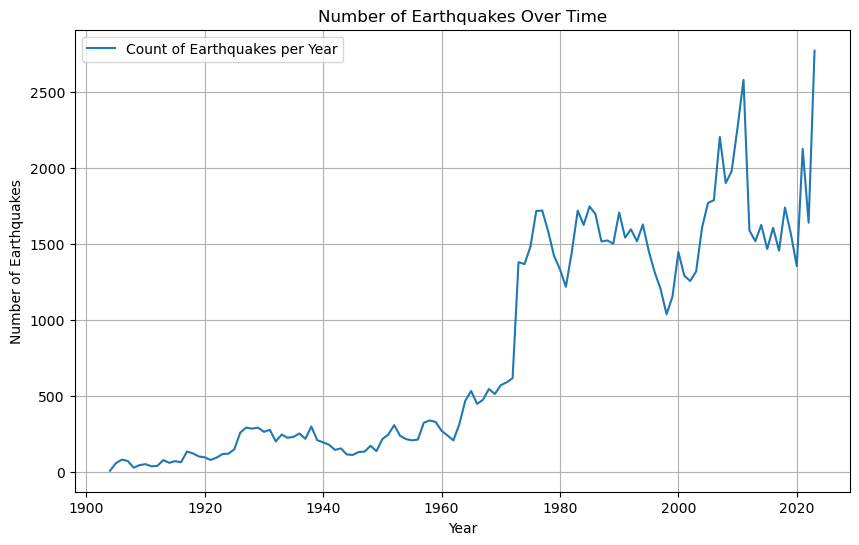

In [78]:
# Generate a line plot for all the earthquakes over time
alleq_plot

# Transpose the DataFrame
df_T = alleq_plot.transpose()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df_T.index, df_T['Count'], label='Count of Earthquakes per Year')

plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes Over Time')
plt.legend()
plt.grid(True)
plt.show()

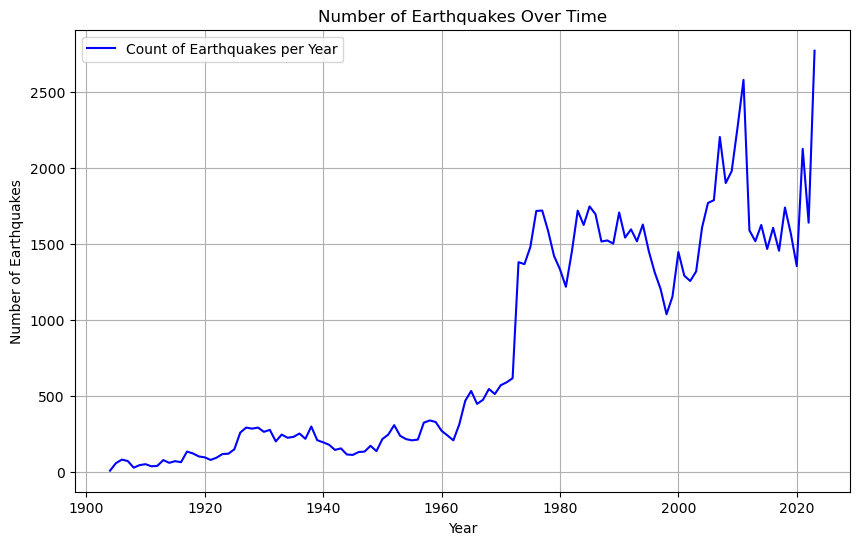

In [79]:

# Transpose the DataFrame
df_T = alleq_plot.transpose()

# Plotting the data with improved pre-attentive attributes
plt.figure(figsize=(10, 6))

# Use a line plot with a different color, marker, and linestyle
# plt.plot(df_T.index, df_T['Count'], color='b', marker='o', linestyle='-', label='Count of Earthquakes per Year')
plt.plot(df_T.index, df_T['Count'], color='b', linestyle='-', label='Count of Earthquakes per Year')


plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes Over Time')
plt.legend()
plt.grid(True)
plt.show()

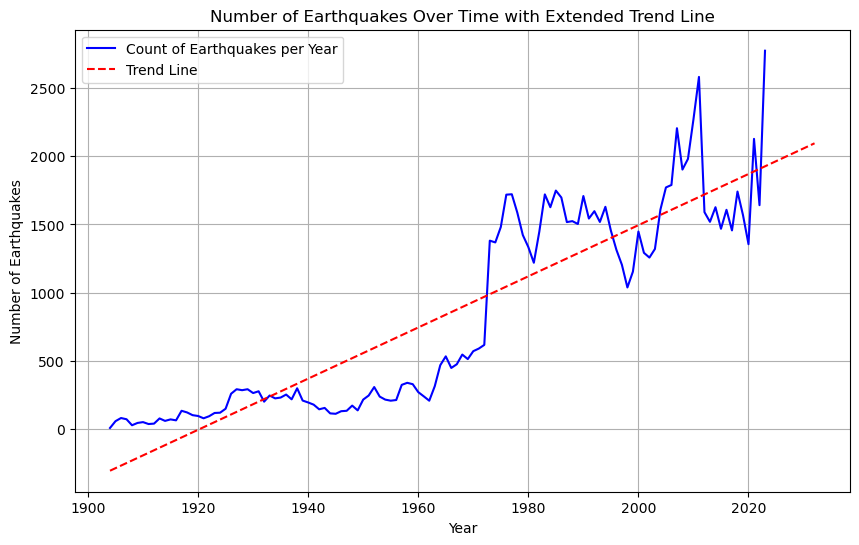

In [80]:
# Assuming alleq_plot is your DataFrame

# Transpose the DataFrame
df_T = alleq_plot.transpose()

# Plotting the data with a trend line
plt.figure(figsize=(10, 6))

# Use a line plot with a trend line (linear regression)
trend_line = np.polyfit(df_T.index, df_T['Count'], 1)  # Calculate the trend line
extended_years = np.arange(df_T.index.min(), df_T.index.max() + 10)  # Extending by 5 years
extended_trend_line = np.polyval(trend_line, extended_years)  # Calculate the trend line for extended years

plt.plot(df_T.index, df_T['Count'], color='b', linestyle='-', label='Count of Earthquakes per Year')
plt.plot(extended_years, extended_trend_line, color='r', linestyle='--', label='Trend Line')

plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes Over Time with Extended Trend Line')
plt.legend()
plt.grid(True)
plt.show()


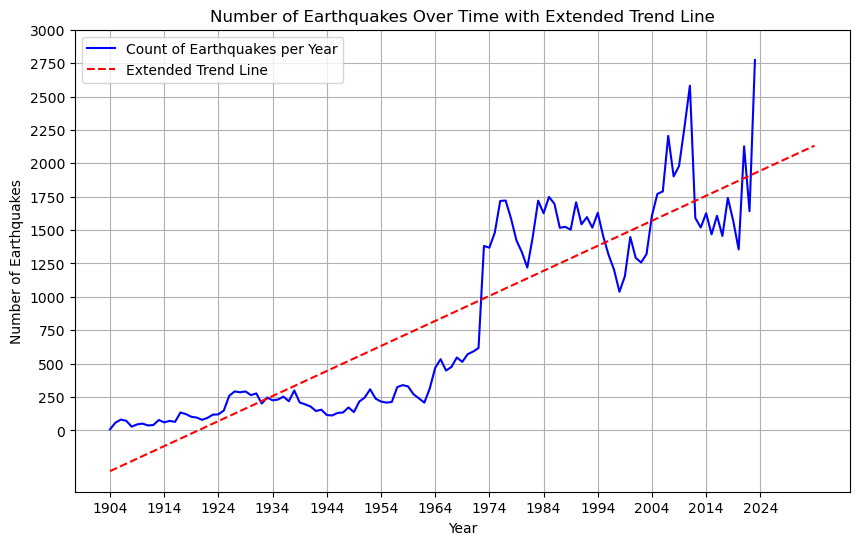

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming alleq_plot is your DataFrame

# Transpose the DataFrame
df_T = alleq_plot.transpose()

# Plotting the data with a trend line
plt.figure(figsize=(10, 6))

# Use a line plot with a trend line (linear regression)
trend_line = np.polyfit(df_T.index, df_T['Count'], 1)  # Calculate the trend line
extended_years = np.arange(df_T.index.min(), df_T.index.max() + 15, 10)  # Extending every 10 years
extended_trend_line = np.polyval(trend_line, extended_years)  # Calculate the trend line for extended years

plt.plot(df_T.index, df_T['Count'], color='b', linestyle='-', label='Count of Earthquakes per Year')
plt.plot(extended_years, extended_trend_line, color='r', linestyle='--', label='Extended Trend Line')

# Set x-axis ticks and labels
plt.xticks(np.arange(df_T.index.min(), df_T.index.max() + 10, 10))

# Set y-axis ticks and labels
plt.yticks(np.arange(0, max(df_T['Count']) + 250, 250))

plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes Over Time with Extended Trend Line')
plt.legend()
plt.grid(True)
plt.show()


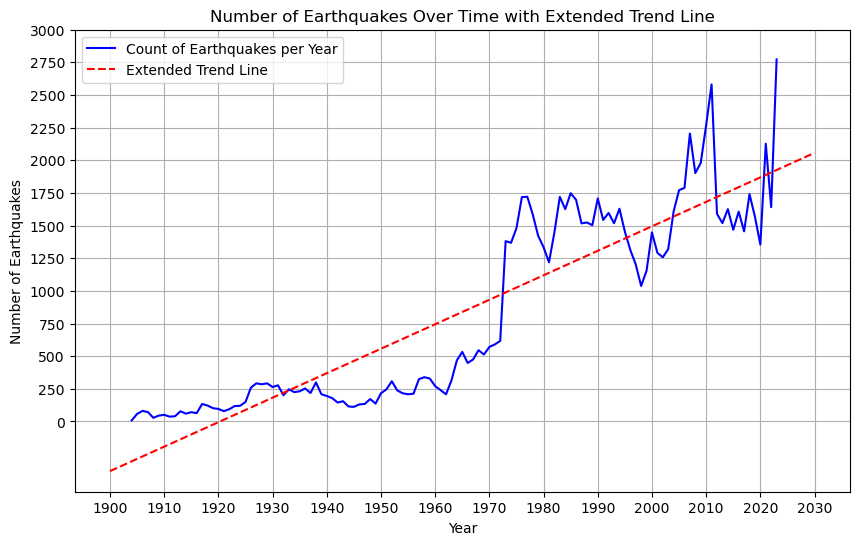

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming alleq_plot is your DataFrame

# Transpose the DataFrame
df_T = alleq_plot.transpose()

# Plotting the data with a trend line
plt.figure(figsize=(10, 6))

# Use a line plot with a trend line (linear regression)
trend_line = np.polyfit(df_T.index, df_T['Count'], 1)  # Calculate the trend line
extended_years = np.arange(1900, 2031, 10)  # Extending every 10 years from 1900 to 2030
extended_trend_line = np.polyval(trend_line, extended_years)  # Calculate the trend line for extended years

plt.plot(df_T.index, df_T['Count'], color='b', linestyle='-', label='Count of Earthquakes per Year')
plt.plot(extended_years, extended_trend_line, color='r', linestyle='--', label='Extended Trend Line')

# Set x-axis ticks and labels
plt.xticks(np.arange(1900, 2031, 10))

# Set y-axis ticks and labels
plt.yticks(np.arange(0, max(df_T['Count']) + 250, 250))

plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes Over Time with Extended Trend Line')
plt.legend()
plt.grid(True)
plt.show()


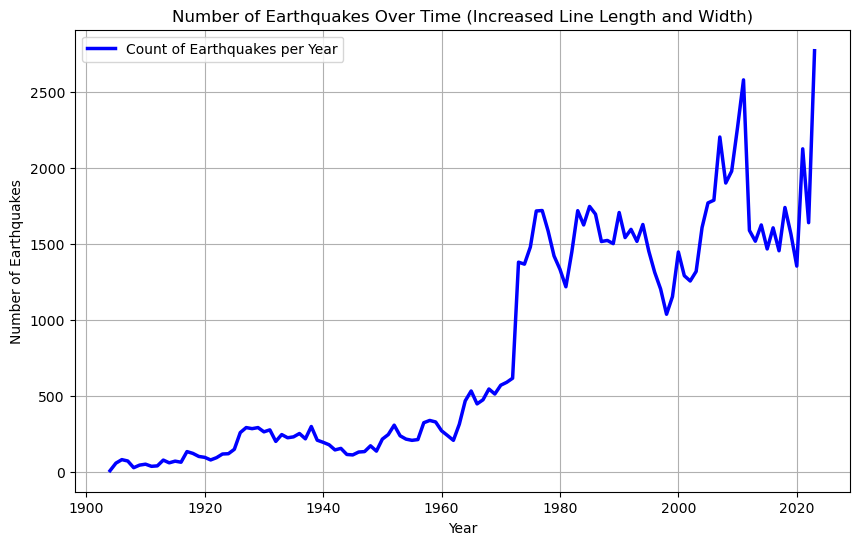

In [83]:
import matplotlib.pyplot as plt

# Assuming alleq_plot is your DataFrame

# Transpose the DataFrame
df_T = alleq_plot.transpose()

# Plotting the data with improved pre-attentive attributes
plt.figure(figsize=(10, 6))

# Use a line plot with increased line length and line width
plt.plot(df_T.index, df_T['Count'], color='b', linestyle='-', linewidth=2.5, label='Count of Earthquakes per Year')

plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes Over Time (Increased Line Length and Width)')
plt.legend()
plt.grid(True)
plt.show()


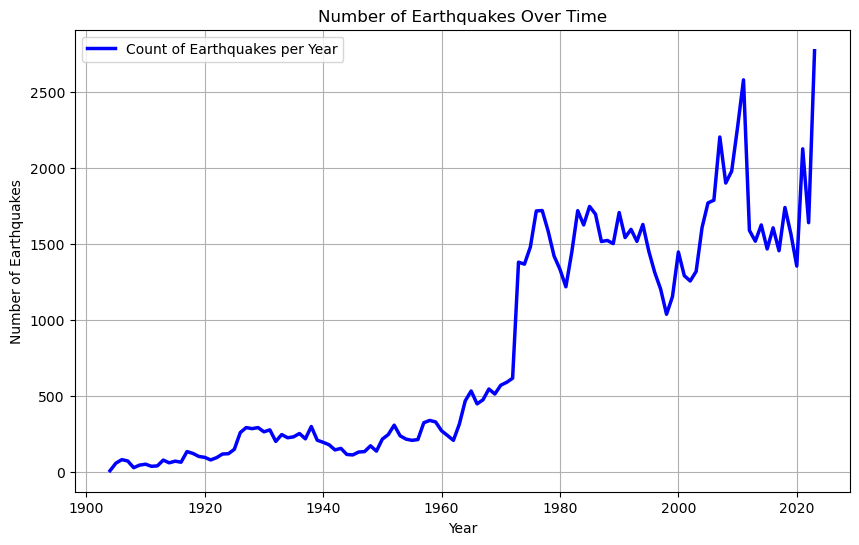

In [84]:
import matplotlib.pyplot as plt

# Assuming alleq_plot is your DataFrame

# Transpose the DataFrame
df_T = alleq_plot.transpose()

# Plotting the data with improved pre-attentive attributes
plt.figure(figsize=(10, 6))

# Use a line plot with increased line length and line width
plt.plot(df_T.index, df_T['Count'], color='b', linestyle='-', linewidth=2.5, label='Count of Earthquakes per Year')

plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes Over Time')
plt.legend()
plt.grid(True)
plt.show()
